## DSC 180AB Data Science Capstone
### Replication Project

Team Members: Shivani Suthar, Josh Brusewitz, Anika Garg, Michael Garcia-Perez, Christine Deng

### Table of Contents
To return to the table of contents, click on the number at any major section heading.

[1. Introduction](#1.-Introduction)

[2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

[3. Model Development](#3.-Model-Development)

[4. Model Evaluation](#4.-Model-Evaluation)

[5. Bias Mitigation](#5.-Bias-Mitigation)

[6. Results Summary](#6.-Results-Summary)

[7. Explainability](#7.-Explainability)

[8. Conclusion & Discussion](#8.-Conclusion-&-Discussion)


## This tutorial demonstrates classification model learning with bias mitigation as a part of a Care Management use case using Medical Expenditure data.

The notebook demonstrates how the AIF 360 toolkit can be used to detect and reduce bias when learning classifiers using a variety of fairness metrics and algorithms . It also demonstrates how explanations can be generated for predictions made by models learnt with the toolkit using LIME.

* Classifiers are built using Logistic Regression as well as Random Forests.
* Bias detection is demonstrated using several metrics, including disparate impact, average odds difference, statistical parity difference, equal opportunity difference, and Theil index.
* Bias alleviation is explored via a variety of methods, including reweighing (pre-processing algorithm), prejudice remover (in-processing algorithm), and disparate impact remover (pre-processing technique).
* Data from the [Medical Expenditure Panel Survey](https://urldefense.com/v3/__https://meps.ahrq.gov/mepsweb/__;!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoCmQ13FCNQ$ ) is used in this tutorial.


The Medical Expenditure Panel Survey (MEPS) provides nationally representative estimates of health expenditure, utilization, payment sources, health status, and health insurance coverage among the noninstitutionalized U.S. population. These government-produced data sets examine how people use the US healthcare system.

MEPS is administered by the Agency for Healthcare Research and Quality (AHRQ) and is divided into three components: 
* Household
* Insurance/Employer, and 
* Medical Provider. 

These components provide comprehensive national estimates of health care use and payment by individuals, families, and any other demographic group of interest.

### [1.](#Table-of-Contents) Introduction

The [AI Fairness 360 toolkit](https://urldefense.com/v3/__https://github.com/Trusted-AI/AIF360__;!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoClZYlhtCA$ ) is an extensible open-source library containing techniques developed by the research community to help detect and mitigate bias in machine learning models throughout the AI application lifecycle. AI Fairness 360 package is available in both Python and R. Documentation is available [here](https://urldefense.com/v3/__https://aif360.readthedocs.io/en/v0.2.3/index.html)*5Cn__;JQ!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoCmzAOEZPw$ 
The AI Fairness 360 package includes: 
- a comprehensive set of metrics for datasets and models to test for biases,
- explanations for these metrics, and
- algorithms to mitigate bias in datasets and models
It is designed to translate algorithmic research from the lab into the actual practice of domains as wide-ranging as finance, human capital management, healthcare, and education

#### 1.1 Use Case

**In order to demonstrate how AIF360 can be used to detect and mitigate bias in classfier models, we adopt the following use case:**

* Data scientist develops a 'fair' healthcare utilization scoring model with respect to defined protected classes. Fairness may be dictated by legal or government regulations, such as a requirement that additional care decisions be not predicated on factors such as race of the patient.
* Developer takes the model AND performance characteristics / specs of the model (e.g. accuracy, fairness tests, etc. basically the model factsheet) and deploys the model in an enterprise app that prioritizes cases for care management.
* The app is put into production and starts scoring people and making recommendations. 
* Explanations are generated for each recommendation
* Both recommendations and associated explanations are given to nurses as a part of the care management process. The nurses can evaluate the recommendations for quality and correctness and provide feedback.
* Nurse feedback as well as analysis of usage data with respect to specs of the model w.r.t accuracy and fairness is communicated to AI Ops specialist and LOB user periodically.
* When significant drift in model specs relative to the model factsheet is observed, the model is sent back for retraining.

#### 1.2 Data
Released as an ASCII file (with related SAS, SPSS, and STATA programming statements) and a SAS transport dataset, this public use file provides information collected on a nationally representative sample of the civilian noninstitutionalized population of the United States for calendar year 2015. This file consists of MEPS survey data obtained in Rounds 3, 4, and 5 of Panel 19 and Rounds 1, 2, and 3 of Panel 20 (i.e., the rounds for the MEPS panels covering calendar year 2015) and consolidates all of the final 2015 person-level variables onto one file. This file contains the following variables previously released on HC-174: survey administration, language of interview variable, demographics, parent identifiers, health status, disability days variables, access to care, employment, quality of care, patient satisfaction, health insurance, and use variables. The HC-181 file also includes these variables: income variables and expenditure variables.

The specific data used is the [2015 Full Year Consolidated Data File](https://urldefense.com/v3/__https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-181__;!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoClqt4t7cg$ ) as well as the [2016 Full Year Consolidated Data File](https://urldefense.com/v3/__https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-192).*5Cn__;JQ!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoCki9hYbsg$ 
* The 2015 file contains data from rounds 3,4,5 of panel 19 (2014) and rounds 1,2,3 of panel 20 (2015). 
* The 2016 file contains data from rounds 3,4,5 of panel 20 (2015) and rounds 1,2,3 of panel 21 (2016).

In this example, three datasets were constructed: one from panel 19, round 5 (used for learning models), one from panel 20, round 3 (used for deployment/testing of model - steps); the other from panel 21, round 3 (used for re-training and deployment/testing of updated model).

#### 1.3 Methodology 

For each dataset, the sensitive attribute is 'RACE' constructed as follows: 'Whites' (privileged class) defined by the features RACEV2X = 1 (White) and HISPANX = 2 (non Hispanic); 'Non-Whites' that included everyone else.  

* Along with race as the sensitive feature, other features used for modeling include demographics  (such as age, gender, active duty status), physical/mental health assessments, diagnosis codes (such as history of diagnosis of cancer, or diabetes), and limitations (such as cognitive or hearing or vision limitation).
* To measure utilization, a composite feature, 'UTILIZATION', was created to measure the total number of trips requiring some sort of medical care by summing up the following features: OBTOTV15(16), the number of office based visits;  OPTOTV15(16), the number of outpatient visits; ERTOT15(16), the number of ER visits;  IPNGTD15(16), the number of inpatient nights, and  + HHTOTD16, the number of home health visits.
* The model classification task is to predict whether a person would have 'high' utilization (defined as UTILIZATION >= 10, roughly the average utilization for the considered population). High utilization respondents constituted around 17% of each dataset.
* To simulate the scenario, each dataset is split into 3 parts: a train, a validation, and a test/deployment part.

**We assume that the model is initially built and tuned using the 2015 Panel 19 train/test data**
* It is then put into practice and used to score people to identify potential candidates for care management. 
* Initial deployment is simulated to 2015 Panel 20 deployment data. 
* To show change in performance and/or fairness over time, the 2016 Panel 21 deployment data is used. 
* Finally, if drift is observed, the 2015 train/validation data is used to learn a new model and evaluated again on the 2016 deployment data

### 1.4 Insert writeup of overall replication project goals and big picture thinking (2-3 paragraphs).  
* Why do we care about this? 
* What would the benefit of predicting utilization be? 
* What might occur if there are errors?
* Who are the affected parties and stakeholders?
* Other thoughts?

**Write up here:**

The field of healthcare management is an important field to study for a multitude of reasons. First, health care policies play a significant role in the quality of healthcare one receives and hence, can significantly impact one's health and overall quality of life. Second, healthcare policies are influenced by many factors which necessitates in-depth analysis of them to insure their fairness to all people. For example, "Health outcomes are influenced by many determinants both within and outside of the traditional health system... policies related to transportation, living wages, and zoning can dramatically impact health outcomes, especially for vulnerable communities with limited resiliency due to socioeconomic barriers'' (Benjamin, 2018). This demonstrates the complexity of healthcare policies and the significance of studying them to insure that no one is unfairly disadvantaged by factors such as their area of residence as policy and health outcomes are highly correlated. Third, there is still unfortunately a lot of discrimination plaguing the healthcare system. For example, “In one of the best-known stratifications for disparities, men of African descent have among the highest CRC (colorectal cancer) incidence and mortality rates of any racial/ethnic groups… the causes of CRC disparities are complex, but the evidence shows that they result primarily from differences in access to preventive and treatment interventions that are driven by SDHs (Social determinants of health)” (Doubeni et al., 2021). This demonstrates that there is still a need for reform within healthcare policy and management and analysis of both would help in identifying areas for improvement. For these reasons, it is important to understand and help improve the healthcare field so that people can achieve the maximum quality of life.

More specifically, looking at utilization within the healthcare field would be be beneficial because predicting utilization allows healthcare providers to identify patients likely to require greater care. The utilization feature considers past number of medical care visits across different offices, so a utilization score considered "high" would indicate that the patient requires more care. By identifying these at risk patients, hospitals can better allocate resources (e.g., staff and inventory) to locations predicted to have a high proportion of patients with high utilization. This also improves the patient's experience as they are able to receive specialized attention. If there are errors in the analysis and models created using the MEPS data, it can mean that patients of healthcare systems are severely negatively affected by changing healthcare costs, bias/discrimination, and other possible misinterpretations of the model and its results. For example, an error in a model that predicts the projected healthcare cost of a patient could cause the patient to be financially unprepared for their treatment, and ultimately result in them being unable to be treated.

The first and most important stakeholders in this situation are the patients. If this model is either implemented or used incorrectly, then they could see impacts to the quality of their care, or perhaps greater financial strain on themselves. With the specified use case, there are precautions in place to prevent this, but inequity in models is not always immediately obvious. The system relies on nurse feedback, and nurses can be subject to biases; it's possible, not likely but possible, for one to not dispute a perceived inequity within the model based on personal opinions towards the patient, and this must be acknowledged. The nurses themselves are also stakeholders in this situation. Through their feedback, they have direct influence on the hospital's approach to managing patients in terms of its own financial stability. The hospital administrators themselves, then, are stakeholders as well here. This model will affect their approach towards ensuring their hospital's continued operation, and miscalibration of the model could lead to costly talks with insurers (also stakeholders in this situation due to the model's effect upon their finances) or even the potential bankruptcy of their hospital. The data scientists and developers behind the model and its deployment are also stakeholders. Their choice of model and effectiveness measures will lead to differences in financial stability in any hospital that uses the model, leaving them in no small part responsible for the outcomes of it. In addition to all of these, the model or the process of its creation could uncover unseemly trends in the insurance industry, leading to potential regulatory action. As such, lawmakers are also stakeholders here due to the potential necessity of use of their legislative powers.

This is an important topic to investigate because it can help improve patient quality of life and can help determine the best care plan for them when analyzed accurately.

---
End of Introduction

### [2.](#Table-of-Contents) Exploratory Data Analysis (EDA)


The specific data used is the [2015 Full Year Consolidated Data File](https://urldefense.com/v3/__https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-181__;!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoClqt4t7cg$ ) as well as the [2016 Full Year Consolidated Data File](https://urldefense.com/v3/__https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-192).*5Cn__;JQ!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoCki9hYbsg$ 
* The 2015 file contains data from rounds 3,4,5 of panel 19 (2014) and rounds 1,2,3 of panel 20 (2015). 
* The 2016 file contains data from rounds 3,4,5 of panel 20 (2015) and rounds 1,2,3 of panel 21 (2016).

In this example, three datasets were constructed: one from panel 19, round 5 (used for learning models), one from panel 20, round 3 (used for deployment/testing of model - steps); the other from panel 21, round 3 (used for re-training and deployment/testing of updated model).

See the corresponding [Codebook](https://urldefense.com/v3/__https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-181__;!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoClqt4t7cg$ ) for information on variables.

##### Key MEPS dataset features include:
* **Utilization**: To measure utilization, a composite feature, 'UTILIZATION', was created to measure the total number of trips requiring some sort of medical care by summing up the following features: OBTOTV15(16), the number of office based visits;  OPTOTV15(16), the number of outpatient visits; ERTOT15(16), the number of ER visits;  IPNGTD15(16), the number of inpatient nights, and  + HHTOTD16, the number of home health visits.
* The model classification task is to predict whether a person would have **'high'** utilization (defined as UTILIZATION >= 10, roughly the average utilization for the considered population). High utilization respondents constituted around 17% of each dataset.

#### 2.0 Pre-processing Scripts (for each Panel)

There is currently minimal EDA for this tutorial within IBM AIF360 Medical Expenditure Tutorial. Therefore, we have adapted  utility scripts from IBM AIF360 Tutorial for ease of understanding for how datasets were pre-processed. These will be used primarily for EDA purposes. We will utilize IBM's tutorial for the remainder of the project. We have utilized Pandas for this portion of the project. 

**Note:** these pre-processing script below are run for each data file, and then filtered for each panel. This was done in order to match subsequent portions of the tutorial, and how train/test/validation datasets were split.

#### 2.1 Get and Load Dataset, Apply Pre-processing

**Before Proceeding Ensure You Have:**
* Forked the AIF360 R=repository and cloned locally to your disk or virtual machine
* Downloaded the `h181.csv` and `h192.csv` data files uploaded [here](https://urldefense.com/v3/__https://www.kaggle.com/datasets/nanrahman/mepsdata)*5Cn__;JQ!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoClHpltBew$ * Place the `h181.csv` and `h192.csv` in a folder you can access (we placed it in `../aif360/data/raw/meps/` of our forked AIF360 repository)
* For EDA we only focus on `h181.csv` 

In [9]:
# Imports
import sys

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display
import pandas as pd
import seaborn as sns

# Datasets
from aif360.datasets import MEPSDataset19
from aif360.datasets import MEPSDataset20
from aif360.datasets import MEPSDataset21

from aif360.datasets import StandardDataset

# Fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

from sklearn.pipeline import make_pipeline

 ### REPLACE THIS SECTION WITH YOUR PREVIOUS EDA ANALYSIS

#### 2.1 Get and Load Dataset, Apply Pre-processing

**Before Proceeding Ensure You Have:**
* Forked the AIF360 R=repository and cloned locally to your disk or virtual machine
* Downloaded the `h181.csv` and `h192.csv` data files uploaded [here](https://www.kaggle.com/datasets/nanrahman/mepsdata)
* Place the `h181.csv` and `h192.csv` in a folder you can access (we placed it in `../aif360/data/raw/meps/` of our forked AIF360 repository)
* For EDA we only focus on `h181.csv` 

In [10]:
!pip install seaborn

In [11]:
raw_181 = pd.read_csv('h181.csv')

In [12]:
raw_181

,DUID,PID,DUPERSID,PANEL,FAMID31,FAMID42,FAMID53,FAMID15,FAMIDYR,CPSFAMID,...,RXOSR15,RXPTR15,RXOTH15,PERWT15F,FAMWT15F,FAMWT15C,SAQWT15F,DIABW15F,VARSTR,VARPSU
0,60001,101,60001101,19,A,A,A,A,A,A,...,0,0,0,21854.981705,22983.493815,22983.493815,23226.272970,26185.048789,1019,1
1,60001,102,60001102,19,A,A,A,A,A,B,...,0,0,4,18169.604822,22983.493815,14663.337957,20624.450027,22682.689497,1019,1
2,60001,103,60001103,19,A,A,A,A,A,B,...,0,0,0,23812.596388,22983.493815,14663.337957,31246.723516,0.000000,1019,1
3,60001,104,60001104,19,A,A,A,A,A,C,...,0,0,0,17191.832515,22983.493815,11200.744542,18125.280372,0.000000,1019,1
4,60001,105,60001105,19,A,A,A,A,A,C,...,0,0,265,20261.485463,22983.493815,11200.744542,0.000000,0.000000,1019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35422,80569,108,80569108,20,B,A,D,D,A,A,...,0,0,0,2812.010290,2449.173357,2449.173357,0.000000,0.000000,1056,2
35423,80570,101,80570101,20,A,A,A,A,A,A,...,0,1248,0,11481.496934,13076.665735,13076.665735,11648.039744,0.000000,1126,1
35424,80571,101,80571101,20,A,A,A,A,A,A,...,0,0,0,8357.376060,7085.589291,7085.589291,9920.807391,0.000000,1144,1
35425,80571,102,80571102,20,A,A,A,A,A,A,...,0,1230,0,8389.102961,7085.589291,7085.589291,9141.136948,0.000000,1144,1


#### Apply pre-processing scripts

In [13]:
default_mappings = {
    'label_maps': [{1.0: '>= 10 Visits', 0.0: '< 10 Visits'}],
    'protected_attribute_maps': [{1.0: 'White', 0.0: 'Non-White'}]}

def default_preprocessing19(df):
    """
    1.Create a new column, RACE that is 'White' if RACEV2X = 1 and HISPANX = 2 i.e. non Hispanic White
      and 'non-White' otherwise
    2. Restrict to Panel 19
    3. RENAME all columns that are PANEL/ROUND SPECIFIC
    4. Drop rows based on certain values of individual features that correspond to missing/unknown - generally < -1
    5. Compute UTILIZATION, binarize it to 0 (< 10) and 1 (>= 10)
    """
    def race(row):
        if ((row['HISPANX'] == 2) and (row['RACEV2X'] == 1)): 
            return 'White'
        return 'Non-White'

    df['RACEV2X'] = df.apply(lambda row: race(row), axis=1)
    df = df.rename(columns = {'RACEV2X' : 'RACE'})
    
    df = df[df['PANEL'] == 19]

    # RENAME COLUMNS
    df = df.rename(columns = {'FTSTU53X' : 'FTSTU', 'ACTDTY53' : 'ACTDTY', 'HONRDC53' : 'HONRDC', 'RTHLTH53' : 'RTHLTH',
                              'MNHLTH53' : 'MNHLTH', 'CHBRON53' : 'CHBRON', 'JTPAIN53' : 'JTPAIN', 'PREGNT53' : 'PREGNT',
                              'WLKLIM53' : 'WLKLIM', 'ACTLIM53' : 'ACTLIM', 'SOCLIM53' : 'SOCLIM', 'COGLIM53' : 'COGLIM',
                              'EMPST53' : 'EMPST', 'REGION53' : 'REGION', 'MARRY53X' : 'MARRY', 'AGE53X' : 'AGE',
                              'POVCAT15' : 'POVCAT', 'INSCOV15' : 'INSCOV'})

    df = df[df['REGION'] >= 0] # remove values -1
    df = df[df['AGE'] >= 0] # remove values -1

    df = df[df['MARRY'] >= 0] # remove values -1, -7, -8, -9

    df = df[df['ASTHDX'] >= 0] # remove values -1, -7, -8, -9

    df = df[(df[['FTSTU','ACTDTY','HONRDC','RTHLTH','MNHLTH','HIBPDX','CHDDX','ANGIDX','EDUCYR','HIDEG',
                             'MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON','CHOLDX','CANCERDX','DIABDX',
                             'JTPAIN','ARTHDX','ARTHTYPE','ASTHDX','ADHDADDX','PREGNT','WLKLIM',
                             'ACTLIM','SOCLIM','COGLIM','DFHEAR42','DFSEE42','ADSMOK42',
                             'PHQ242','EMPST','POVCAT','INSCOV']] >= -1).all(1)]  #for all other categorical features, remove values < -1

    def utilization(row):
        return row['OBTOTV15'] + row['OPTOTV15'] + row['ERTOT15'] + row['IPNGTD15'] + row['HHTOTD15']

    df['TOTEXP15'] = df.apply(lambda row: utilization(row), axis=1)
    lessE = df['TOTEXP15'] < 10.0
    df.loc[lessE,'TOTEXP15'] = 0.0
    moreE = df['TOTEXP15'] >= 10.0
    df.loc[moreE,'TOTEXP15'] = 1.0

    df = df.rename(columns = {'TOTEXP15' : 'UTILIZATION'})
    return df

In [14]:
def default_preprocessing20(df):
    """
    1.Create a new column, RACE that is 'White' if RACEV2X = 1 and HISPANX = 2 i.e. non Hispanic White
      and 'non-White' otherwise
    2. Restrict to Panel 20
    3. RENAME all columns that are PANEL/ROUND SPECIFIC
    4. Drop rows based on certain values of individual features that correspond to missing/unknown - generally < -1
    5. Compute UTILIZATION, binarize it to 0 (< 10) and 1 (>= 10)
    """
    def race(row):
        if ((row['HISPANX'] == 2) and (row['RACEV2X'] == 1)):  #non-Hispanic Whites are marked as WHITE; all others as NON-WHITE
            return 'White'
        return 'Non-White'

    df['RACEV2X'] = df.apply(lambda row: race(row), axis=1)
    df = df.rename(columns = {'RACEV2X' : 'RACE'})

    df = df[df['PANEL'] == 20]

    # RENAME COLUMNS
    df = df.rename(columns = {'FTSTU53X' : 'FTSTU', 'ACTDTY53' : 'ACTDTY', 'HONRDC53' : 'HONRDC', 'RTHLTH53' : 'RTHLTH',
                              'MNHLTH53' : 'MNHLTH', 'CHBRON53' : 'CHBRON', 'JTPAIN53' : 'JTPAIN', 'PREGNT53' : 'PREGNT',
                              'WLKLIM53' : 'WLKLIM', 'ACTLIM53' : 'ACTLIM', 'SOCLIM53' : 'SOCLIM', 'COGLIM53' : 'COGLIM',
                              'EMPST53' : 'EMPST', 'REGION53' : 'REGION', 'MARRY53X' : 'MARRY', 'AGE53X' : 'AGE',
                              'POVCAT15' : 'POVCAT', 'INSCOV15' : 'INSCOV'})

    df = df[df['REGION'] >= 0] # remove values -1
    df = df[df['AGE'] >= 0] # remove values -1

    df = df[df['MARRY'] >= 0] # remove values -1, -7, -8, -9

    df = df[df['ASTHDX'] >= 0] # remove values -1, -7, -8, -9

    df = df[(df[['FTSTU','ACTDTY','HONRDC','RTHLTH','MNHLTH','HIBPDX','CHDDX','ANGIDX','EDUCYR','HIDEG',
                             'MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON','CHOLDX','CANCERDX','DIABDX',
                             'JTPAIN','ARTHDX','ARTHTYPE','ASTHDX','ADHDADDX','PREGNT','WLKLIM',
                             'ACTLIM','SOCLIM','COGLIM','DFHEAR42','DFSEE42','ADSMOK42',
                             'PHQ242','EMPST','POVCAT','INSCOV']] >= -1).all(1)]  #for all other categorical features, remove values < -1

    def utilization(row):
        return row['OBTOTV15'] + row['OPTOTV15'] + row['ERTOT15'] + row['IPNGTD15'] + row['HHTOTD15']

    df['TOTEXP15'] = df.apply(lambda row: utilization(row), axis=1)
    lessE = df['TOTEXP15'] < 10.0
    df.loc[lessE,'TOTEXP15'] = 0.0
    moreE = df['TOTEXP15'] >= 10.0
    df.loc[moreE,'TOTEXP15'] = 1.0

    df = df.rename(columns = {'TOTEXP15' : 'UTILIZATION'})
    return df

#### Taken from pre-processing scripts to retain same columns used in model development for tutorial

In [15]:
label_name='UTILIZATION'
favorable_classes=[1.0]
protected_attribute_names=['RACE']
privileged_classes=[['White']]
instance_weights_name='PERWT15F'
categorical_features=['REGION','SEX','MARRY',
                                 'FTSTU','ACTDTY','HONRDC','RTHLTH','MNHLTH','HIBPDX','CHDDX','ANGIDX',
                                 'MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON','CHOLDX','CANCERDX','DIABDX',
                                 'JTPAIN','ARTHDX','ARTHTYPE','ASTHDX','ADHDADDX','PREGNT','WLKLIM',
                                 'ACTLIM','SOCLIM','COGLIM','DFHEAR42','DFSEE42', 'ADSMOK42', 'PHQ242',
                                 'EMPST','POVCAT','INSCOV']

features_to_keep=['REGION','AGE','SEX','RACE','MARRY',
                                 'FTSTU','ACTDTY','HONRDC','RTHLTH','MNHLTH','HIBPDX','CHDDX','ANGIDX',
                                 'MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON','CHOLDX','CANCERDX','DIABDX',
                                 'JTPAIN','ARTHDX','ARTHTYPE','ASTHDX','ADHDADDX','PREGNT','WLKLIM',
                                 'ACTLIM','SOCLIM','COGLIM','DFHEAR42','DFSEE42', 'ADSMOK42',
                                 'PCS42','MCS42','K6SUM42','PHQ242','EMPST','POVCAT','INSCOV','UTILIZATION', 'PERWT15F']
features_to_drop=[]
na_values=[]
# custom_preprocessing=default_preprocessing <- don't need this yet for EDA
metadata=default_mappings


We encourage you to search through the repository and take a look at these scripts, 
they can be found in `../aif360/dataset/` in your forked AIF360 repository:
* AIF360/aif360/datasets/meps_dataset_panel19_fy2015.py
* AIF360/aif360/datasets/meps_dataset_panel20_fy2015.py

To Explore the `Utilization` and `RACE` features, and the variables used to impute these features:
* See the corresponding [HC 181 Codebook](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-181) for information on variables.

In [16]:
df_panel_19 = default_preprocessing19(raw_181)
df_panel_19_reduced = df_panel_19[features_to_keep]

In [17]:
df_panel_20 = default_preprocessing20(raw_181)
df_panel_20_reduced = df_panel_20[features_to_keep]

In [18]:
#### END OF PRE-PROCRESSING ####

#### 2.2 Data shape and features

In [19]:
df_panel_19_reduced

,REGION,AGE,SEX,RACE,MARRY,FTSTU,ACTDTY,HONRDC,RTHLTH,MNHLTH,...,ADSMOK42,PCS42,MCS42,K6SUM42,PHQ242,EMPST,POVCAT,INSCOV,UTILIZATION,PERWT15F
0,2,53,1,White,5,-1,2,2,4,3,...,2,25.93,58.47,3,0,4,1,2,1,21854.981705
1,2,56,2,White,3,-1,2,2,4,3,...,2,20.42,26.57,17,6,4,3,2,1,18169.604822
3,2,23,2,White,5,3,2,2,1,1,...,2,53.12,50.33,7,0,1,2,2,0,17191.832515
4,2,3,1,White,6,-1,3,3,1,3,...,-1,-1.00,-1.00,-1,-1,-1,2,2,0,20261.485463
5,3,27,1,Non-White,1,-1,1,4,2,1,...,-1,-1.00,-1.00,-1,-1,1,3,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16573,3,25,1,Non-White,1,-1,2,2,1,1,...,2,56.71,62.39,0,0,1,1,1,0,4111.315754
16574,3,25,2,Non-White,1,-1,2,2,1,1,...,2,56.71,62.39,0,0,4,1,1,0,5415.228173
16575,3,2,2,White,6,-1,3,3,1,1,...,-1,-1.00,-1.00,-1,-1,-1,1,2,0,3896.116219
16576,1,54,2,Non-White,3,-1,2,2,1,1,...,2,43.97,42.45,24,0,1,3,2,0,4883.851005


In [20]:
df_panel_20_reduced

,REGION,AGE,SEX,RACE,MARRY,FTSTU,ACTDTY,HONRDC,RTHLTH,MNHLTH,...,ADSMOK42,PCS42,MCS42,K6SUM42,PHQ242,EMPST,POVCAT,INSCOV,UTILIZATION,PERWT15F
16578,3,65,1,Non-White,1,-1,4,1,3,3,...,2,39.15,64.23,1,1,1,4,1,0,11966.862856
16579,3,57,2,Non-White,1,-1,2,2,3,3,...,2,23.61,48.28,5,3,4,4,1,1,10300.188631
16580,4,40,1,Non-White,1,-1,2,2,3,3,...,2,53.97,52.82,4,0,1,5,1,0,18749.279706
16581,3,55,2,Non-White,5,-1,2,2,3,3,...,1,40.50,61.61,0,0,1,2,2,0,5532.628347
16582,3,21,2,Non-White,5,1,2,2,3,3,...,-1,-1.00,-1.00,-1,-1,4,2,3,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35422,3,8,1,Non-White,6,-1,3,3,1,1,...,-1,-1.00,-1.00,-1,-1,-1,1,2,0,2812.010290
35423,2,30,2,Non-White,5,-1,2,2,3,2,...,2,44.32,28.41,7,2,1,3,1,1,11481.496934
35424,3,32,1,Non-White,1,-1,2,2,3,2,...,2,36.80,61.23,1,0,1,5,1,0,8357.376060
35425,3,32,2,Non-White,1,-1,2,2,2,2,...,2,56.48,47.77,1,0,1,5,1,0,8389.102961


In [21]:
# Identify feature names
feat_names = df_panel_19_reduced.columns

# Check for categorical features

# For ones storing categorical data
categorical_features=['REGION','SEX','MARRY',
                                 'FTSTU','ACTDTY','HONRDC','RTHLTH','MNHLTH','HIBPDX','CHDDX','ANGIDX',
                                 'MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON','CHOLDX','CANCERDX','DIABDX',
                                 'JTPAIN','ARTHDX','ARTHTYPE','ASTHDX','ADHDADDX','PREGNT','WLKLIM',
                                 'ACTLIM','SOCLIM','COGLIM','DFHEAR42','DFSEE42', 'ADSMOK42', 'PHQ242',
                                 'EMPST','POVCAT','INSCOV']



# Summary statistics
sum_stats_19 = df_panel_19_reduced.describe()
sum_stats_20 = df_panel_20_reduced.describe()

# Shapes
df19_shape = df_panel_19_reduced.shape
df20_shape = df_panel_20_reduced.shape

***Plotting distributions of features***

Sex

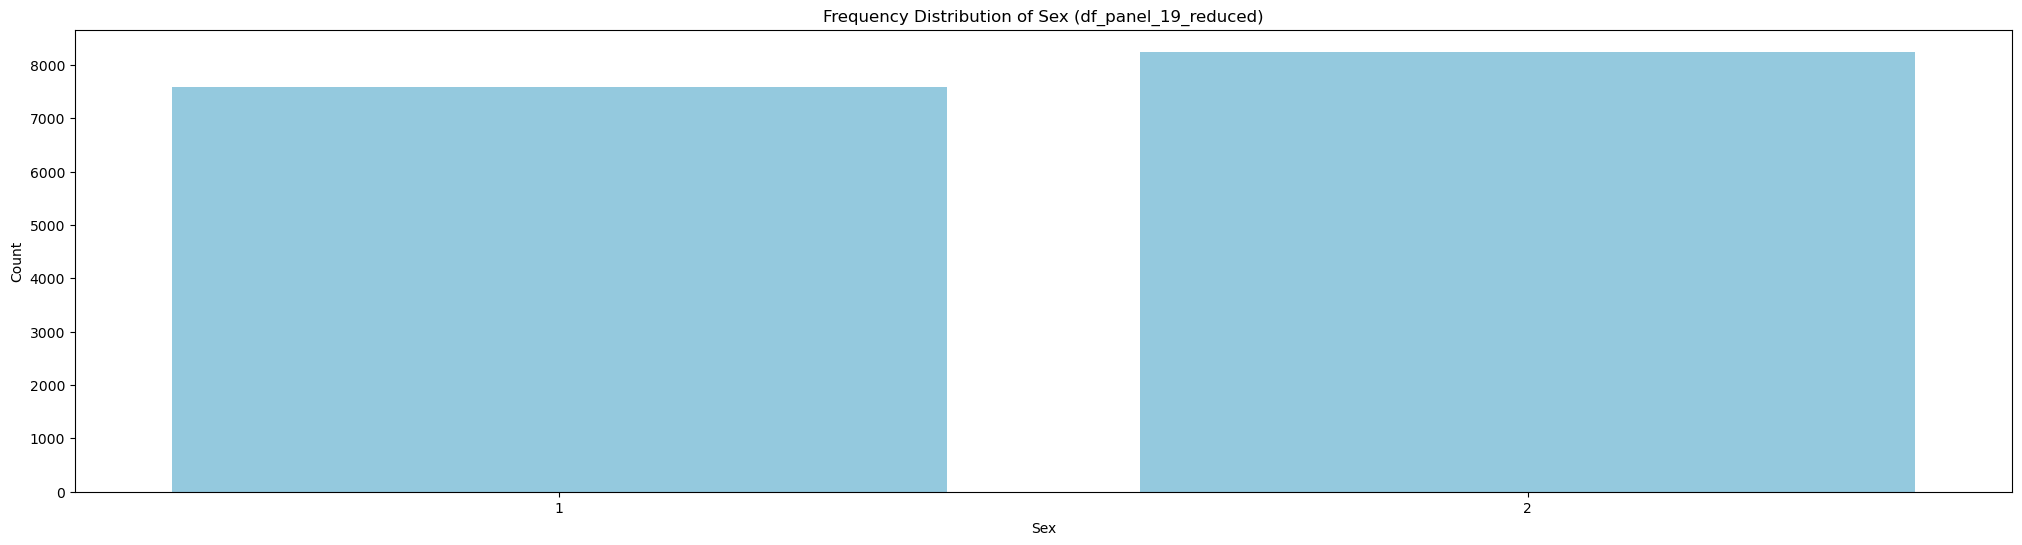

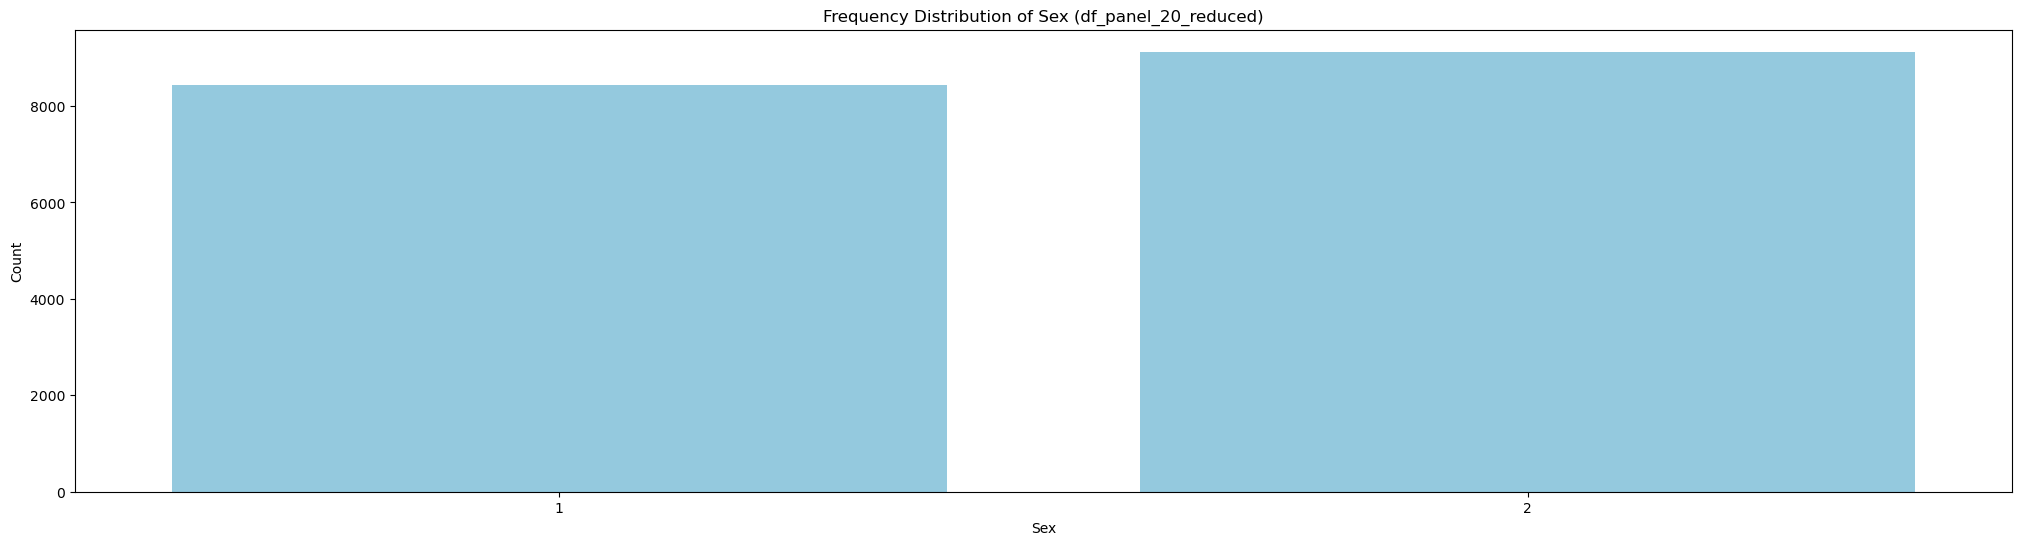

In [48]:
# The following code plots the frequency distribution for sex for df_panel_19_reduced:
plt.figure(figsize=(25, 6)) 
sns.countplot(data=df_panel_19_reduced, x="SEX", color='skyblue') 

plt.title("Frequency Distribution of Sex (df_panel_19_reduced)")
plt.xlabel("Sex")
plt.ylabel("Count")

plt.show()

# The following code plots the frequency distribution for sex for df_panel_20_reduced:
plt.figure(figsize=(25, 6)) 
sns.countplot(data=df_panel_20_reduced, x="SEX", color='skyblue') 

plt.title("Frequency Distribution of Sex (df_panel_20_reduced)")
plt.xlabel("Sex")
plt.ylabel("Count")

plt.show()

Marital Status

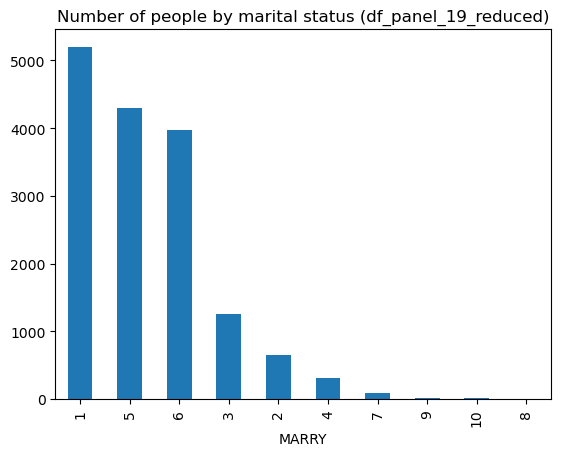

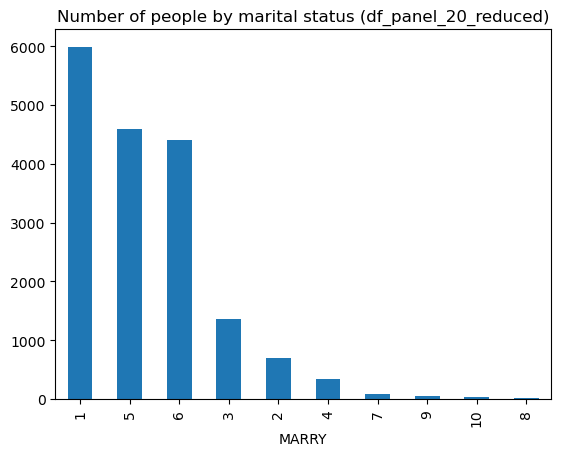

In [49]:
# Number of people by marital status -- both dataframes show same distribution
# Most people are married or never married
df_panel_19_reduced['MARRY'].value_counts().plot(kind='bar')
plt.title('Number of people by marital status (df_panel_19_reduced)')
plt.show()
df_panel_20_reduced['MARRY'].value_counts().plot(kind='bar')
plt.title('Number of people by marital status (df_panel_20_reduced)')
plt.show()

Region

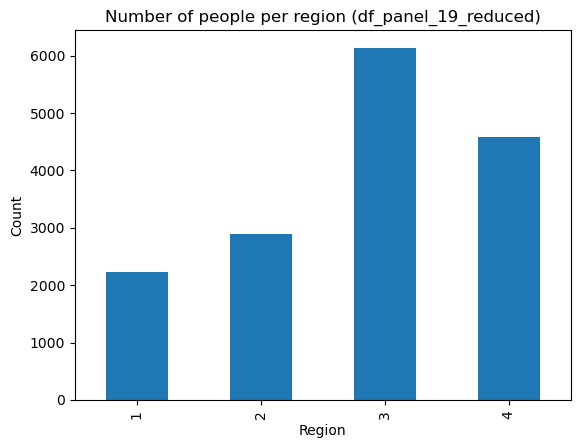

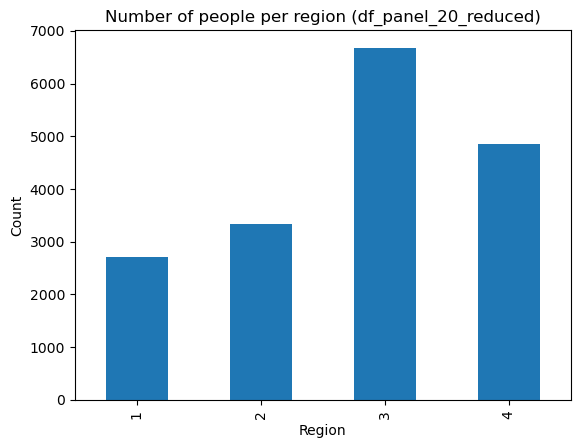

In [50]:
# Generate bar plot showing number of people per region df_panel_19_reduced
region_counts = df_panel_19_reduced.groupby("REGION").count()["AGE"]
region_counts.plot(x='REGION', kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of people per region (df_panel_19_reduced)')
plt.show()

# Generate bar plot showing number of people per region df_panel_20_reduced
region_counts = df_panel_20_reduced.groupby("REGION").count()["AGE"]
region_counts.plot(x='REGION', kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of people per region (df_panel_20_reduced)')
plt.show()

Age

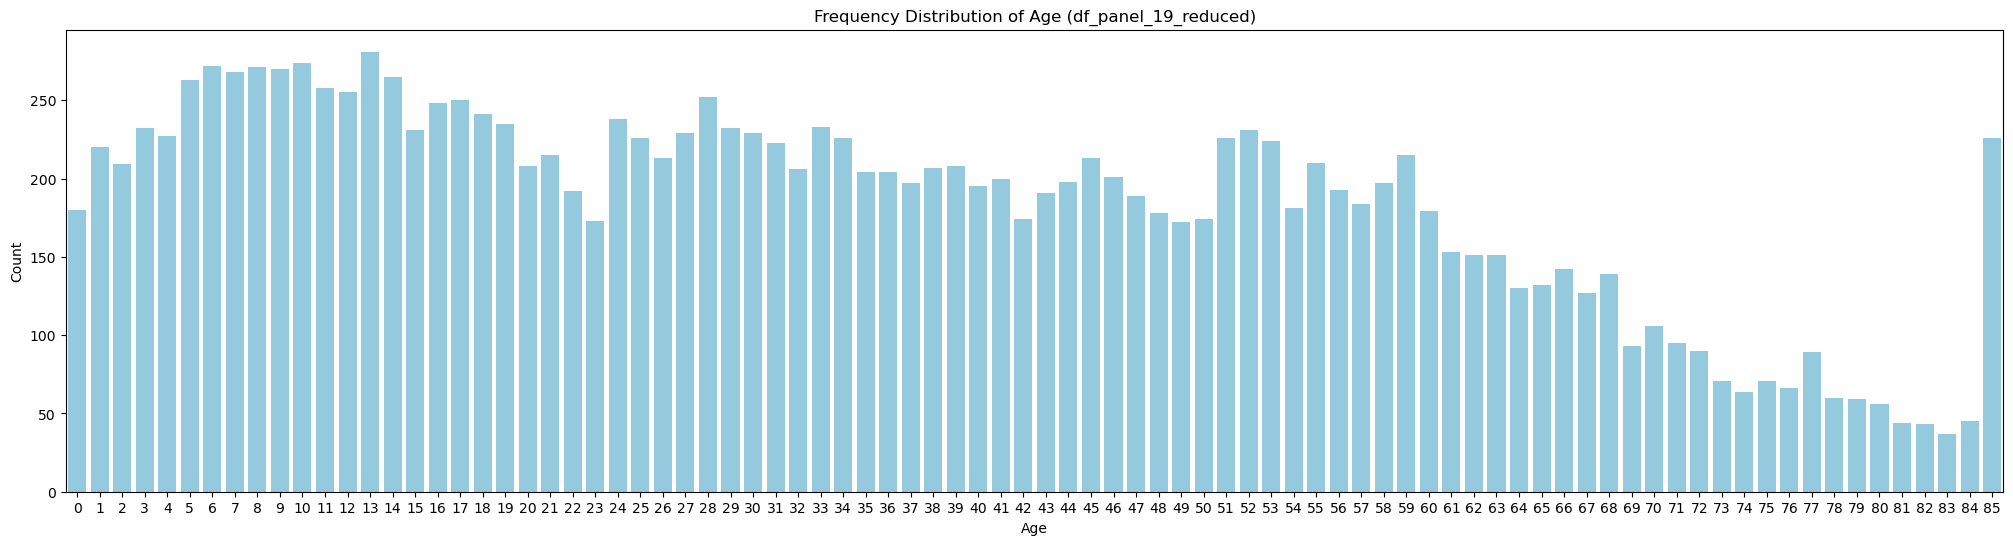

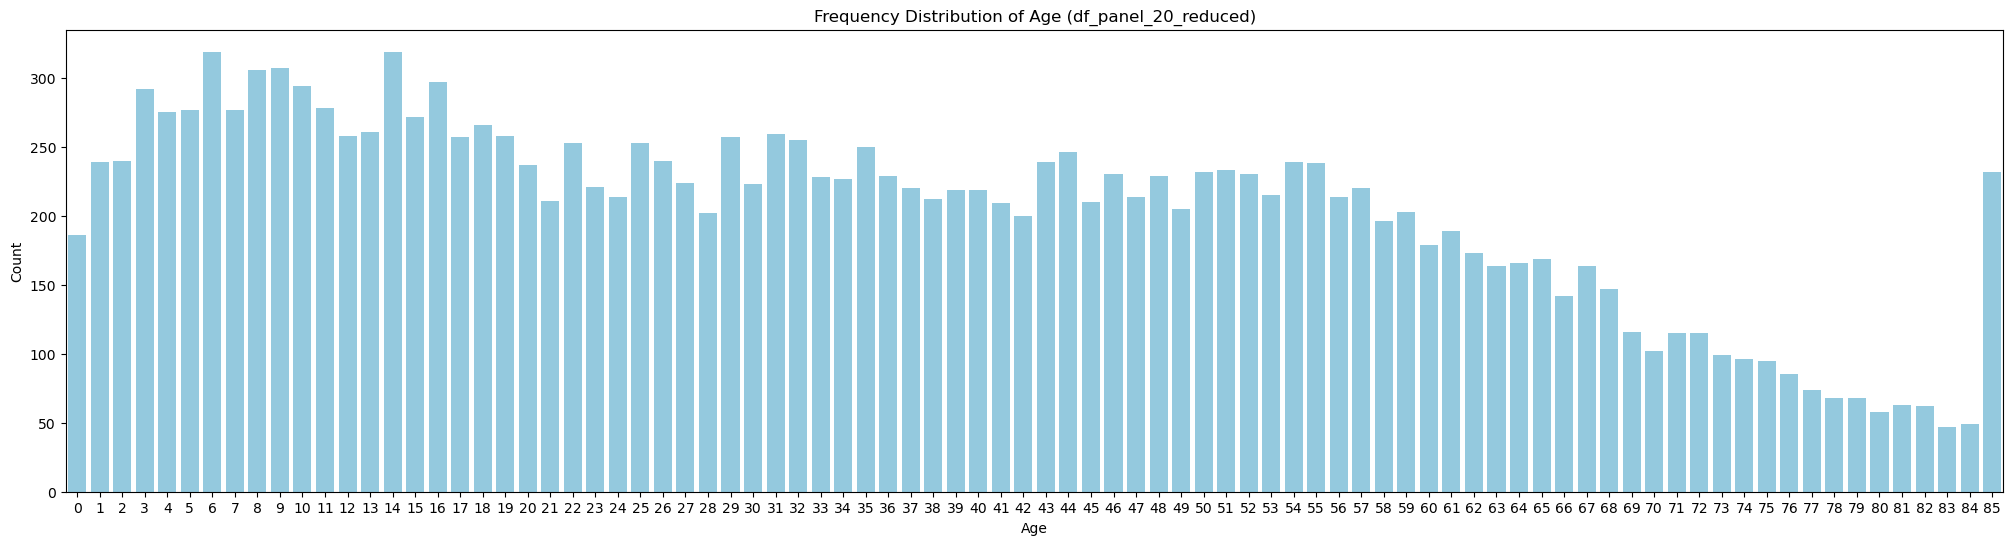

In [51]:
# The following code plots the frequency distribution for age for df_panel_19_reduced:
plt.figure(figsize=(25, 6)) 
sns.countplot(data=df_panel_19_reduced, x="AGE", color='skyblue') 

plt.title("Frequency Distribution of Age (df_panel_19_reduced)")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

# The following code plots the frequency distribution for age for df_panel_20_reduced:
plt.figure(figsize=(25, 6)) 
sns.countplot(data=df_panel_20_reduced, x="AGE", color='skyblue') 

plt.title("Frequency Distribution of Age (df_panel_20_reduced)")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

Race

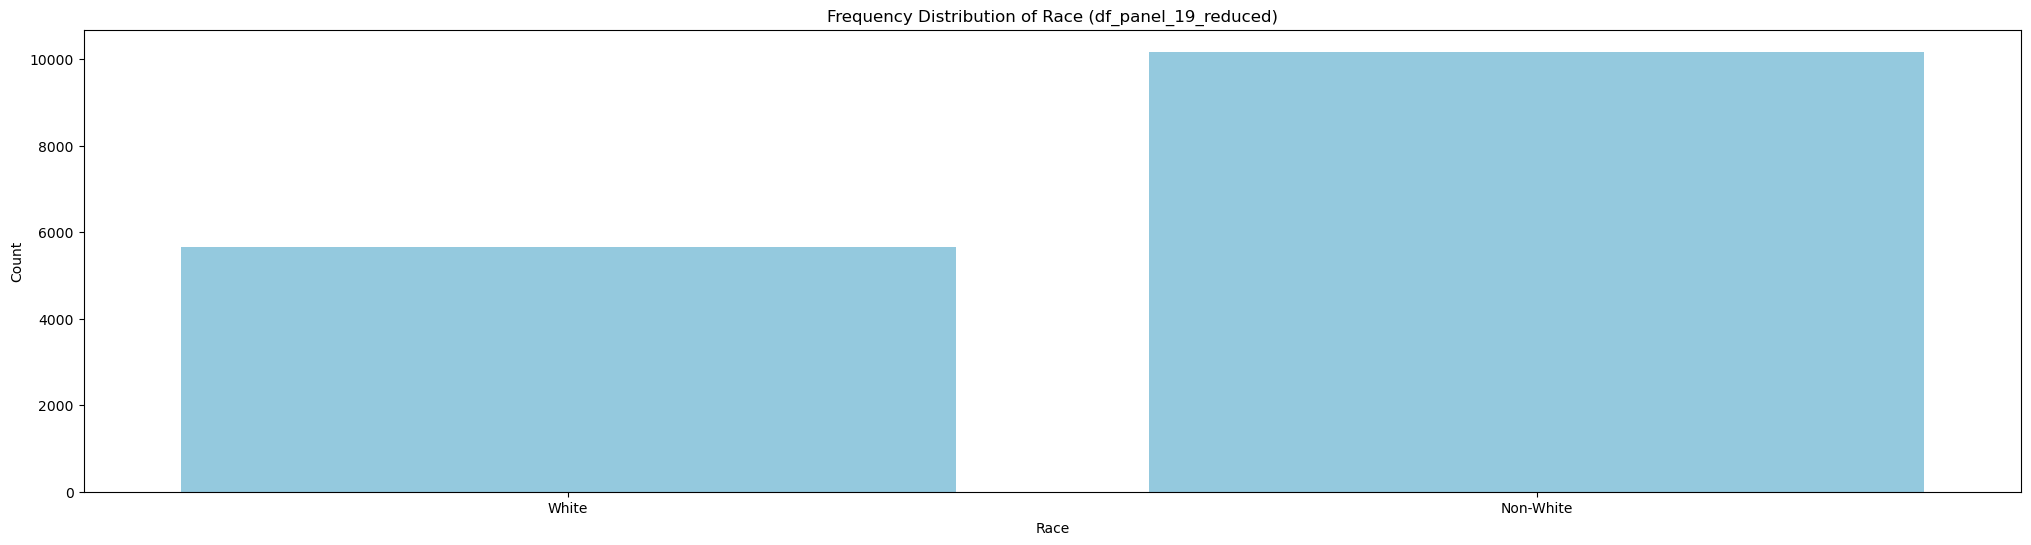

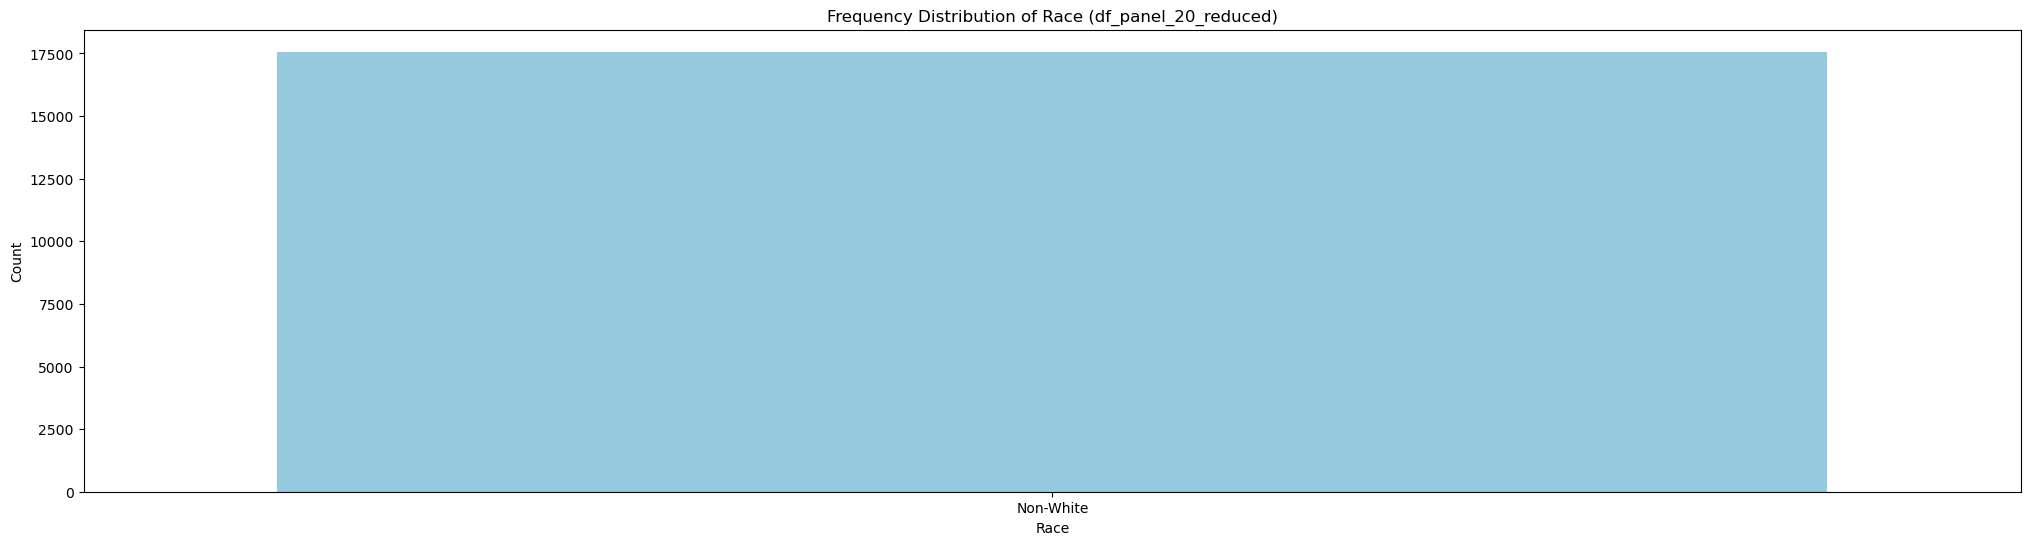

In [52]:
# The following code plots the frequency distribution for race for df_panel_19_reduced:
plt.figure(figsize=(25, 6)) 
sns.countplot(data=df_panel_19_reduced, x="RACE", color='skyblue') 

plt.title("Frequency Distribution of Race (df_panel_19_reduced)")
plt.xlabel("Race")
plt.ylabel("Count")

plt.show()

# The following code plots the frequency distribution for race for df_panel_20_reduced:
plt.figure(figsize=(25, 6)) 
sns.countplot(data=df_panel_20_reduced, x="RACE", color='skyblue') 

plt.title("Frequency Distribution of Race (df_panel_20_reduced)")
plt.xlabel("Race")
plt.ylabel("Count")

plt.show()

#### 2.3 Outlier Detection and Handling

In [22]:
# # Null handling

df_panel_19_reduced['RACE'] = df_panel_19_reduced['RACE'].fillna('None Listed')

df_panel_19_reduced.isna().sum()

df_panel_20_reduced.isna().sum()

mean_value_ut=df_panel_20_reduced['UTILIZATION'].mean()

mean_value_per=df_panel_20_reduced['PERWT15F'].mean()


df_panel_20_reduced['UTILIZATION'].fillna(value=mean_value_ut, inplace=True)

df_panel_20_reduced['PERWT15F'].fillna(value=mean_value_per, inplace=True)


df_panel_20_reduced.isna().sum()

# Outliers:
from scipy import stats

df_panel_19_reduced[df_panel_19_reduced.columns[1]].value_counts()

# Find points that are at least 3 standard deviations away from the mean
numerical_df_19_reduced = df_panel_19_reduced[[i for i in df_panel_19_reduced.columns if df_panel_19_reduced.dtypes[i]!='object']]
z_scores = stats.zscore(numerical_df_19_reduced, nan_policy='omit')
z_scores_df = pd.DataFrame(z_scores, columns=numerical_df_19_reduced.columns, index=numerical_df_19_reduced.index)
outliers = (z_scores_df.abs() > 3)
outliers.sum(axis=0)
# This approach mostly works, but in some cases, it fails. For example, in ASTHDX, or "Asthma Diagnosis,"
# it marks all asthma patients as outliers due to how the standard deviation calculation works out.
# Most true outliers are expected, such as the very low amount of honorably discharged people who are
# also currently active servicemembers.
# We investigated which columns contained outliers by running .value_counts() on them and cross-referencing
# with the data file on what each outlier term meant

/var/folders/rf/h6_7bsv91nscjbz1j5xqns5r0000gp/T/ipykernel_47311/4000984789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_panel_19_reduced['RACE'] = df_panel_19_reduced['RACE'].fillna('None Listed')
/var/folders/rf/h6_7bsv91nscjbz1j5xqns5r0000gp/T/ipykernel_47311/4000984789.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_panel_20_reduced['UTILIZATION'].fillna(value=mean_value_ut, inplace=True)
/var/folders/rf/h6_7bsv91nscjbz1j5xqns5r0000gp/T/ipykernel_47311/4000984789.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

REGION            0
AGE               0
SEX               0
MARRY             0
FTSTU           639
ACTDTY            0
HONRDC           11
RTHLTH           18
MNHLTH            0
HIBPDX            0
CHDDX             0
ANGIDX            0
MIDX              0
OHRTDX            0
STRKDX            0
EMPHDX            0
CHBRON            0
CHOLDX            0
CANCERDX          0
DIABDX            0
JTPAIN            0
ARTHDX            0
ARTHTYPE          0
ASTHDX         1476
ADHDADDX          0
PREGNT            0
WLKLIM           18
ACTLIM         1086
SOCLIM          718
COGLIM            0
DFHEAR42        357
DFSEE42         357
ADSMOK42          0
PCS42             0
MCS42             0
K6SUM42         355
PHQ242          521
EMPST             0
POVCAT            0
INSCOV            0
UTILIZATION       0
PERWT15F        295
dtype: int64

In [23]:
numerical_df_19_reduced['DFSEE42'].value_counts()

DFSEE42
 2    15041
 1      432
-1      357
Name: count, dtype: int64

#### 2.4 Correlation Analysis

***Examining correlation between different features (checking for multicollinearity)***

Marriage vs. Age

Text(0.5, 1.0, 'Marriage distribution by age (df_panel_19_reduced)')

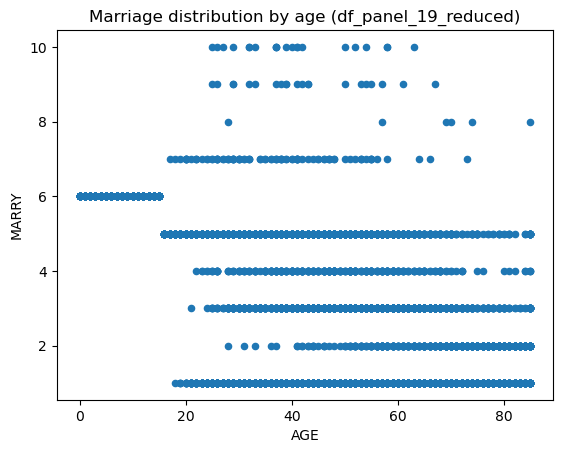

In [38]:
# Marriage distribution by age
# People who are married correlated with ages higher than 20
df_panel_19_reduced.plot.scatter(x='AGE', y='MARRY')
plt.title("Marriage distribution by age (df_panel_19_reduced)")

Age vs. Component Summary PCS42

Text(0.5, 1.0, 'Age vs. Component Summary PCS42 (df_panel_19_reduced)')

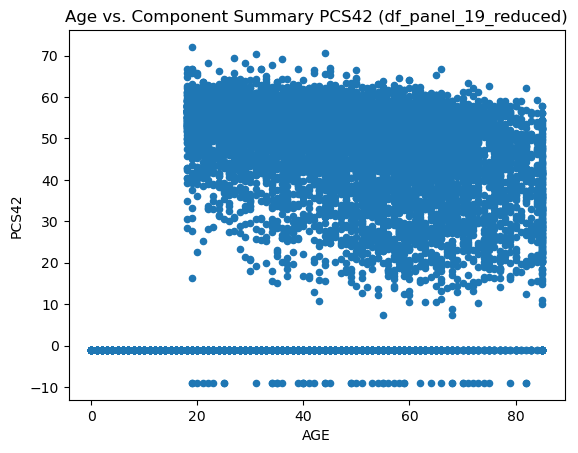

In [39]:
# Correlation between age & component summary PCS42
# Slightly negative trend but overall no correlation
df_panel_19_reduced.plot.scatter(x='AGE', y='PCS42')
plt.title("Age vs. Component Summary PCS42 (df_panel_19_reduced)")

***Examining proportions of demographics that have utilization***

In [41]:
# Comparing the proportion of each of these demographics that have utilization to see if there is a greater proportion of utilization in some groups compares to others

Utilization by sex

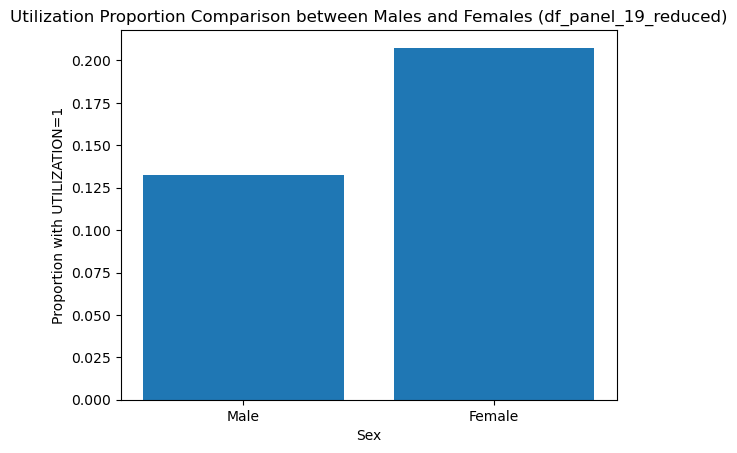

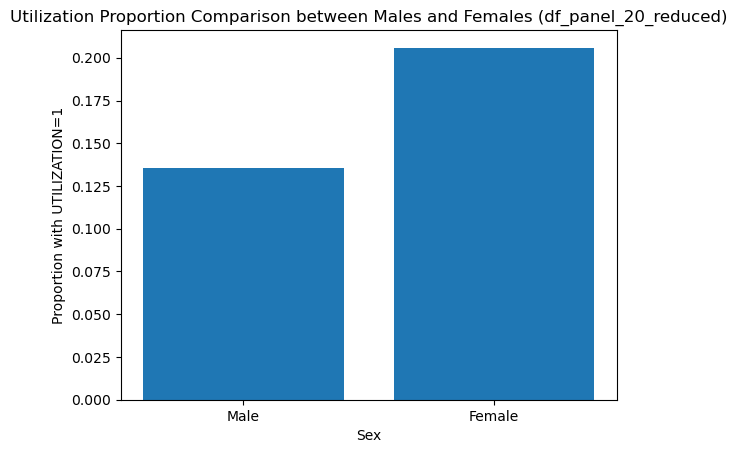

In [42]:
# The following code plots the proportion of females and males that have utilization for df_panel_19_reduced:
males = df_panel_19_reduced[df_panel_19_reduced['SEX'] == 1]
females = df_panel_19_reduced[df_panel_19_reduced['SEX'] == 2]

male_utilization_count = males['UTILIZATION'].sum()
female_utilization_count = females['UTILIZATION'].sum()

total_male_count = len(males)
total_female_count = len(females)

male_utilization_proportion = male_utilization_count / total_male_count
female_utilization_proportion = female_utilization_count / total_female_count

categories = ['Male', 'Female']
utilization_proportions = [male_utilization_proportion, female_utilization_proportion]

plt.bar(categories, utilization_proportions)
plt.xlabel('Sex')
plt.ylabel('Proportion with UTILIZATION=1')
plt.title('Utilization Proportion Comparison between Males and Females (df_panel_19_reduced)')
plt.show()


# The following code plots the proportion of females and males that have utilization for df_panel_20_reduced:
males = df_panel_20_reduced[df_panel_20_reduced['SEX'] == 1]
females = df_panel_20_reduced[df_panel_20_reduced['SEX'] == 2]

male_utilization_count = males['UTILIZATION'].sum()
female_utilization_count = females['UTILIZATION'].sum()

total_male_count = len(males)
total_female_count = len(females)

male_utilization_proportion = male_utilization_count / total_male_count
female_utilization_proportion = female_utilization_count / total_female_count

categories = ['Male', 'Female']
utilization_proportions = [male_utilization_proportion, female_utilization_proportion]

plt.bar(categories, utilization_proportions)
plt.xlabel('Sex')
plt.ylabel('Proportion with UTILIZATION=1')
plt.title('Utilization Proportion Comparison between Males and Females (df_panel_20_reduced)')

plt.show()

Race

/var/folders/rf/h6_7bsv91nscjbz1j5xqns5r0000gp/T/ipykernel_47311/1865483086.py:12: RuntimeWarning: invalid value encountered in scalar divide
  none_listed_utilization_proportion = none_listed_utilization_count / total_none_listed_count


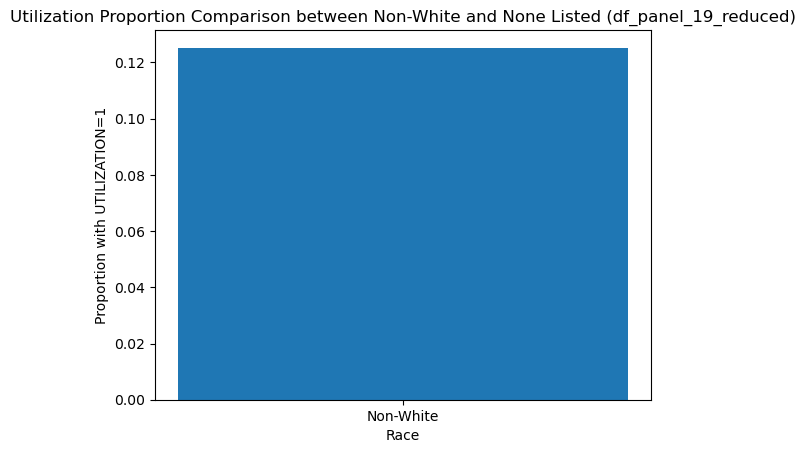

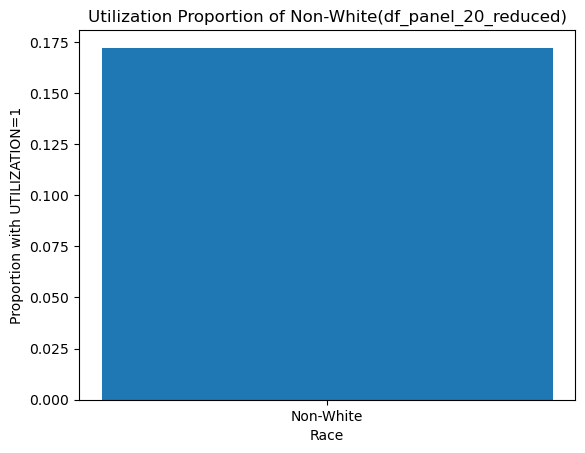

In [43]:
# The following code plots the proportion for race that have utilization for df_panel_19_reduced:
non_white = df_panel_19_reduced[df_panel_19_reduced['RACE'] == 'Non-White']
none_listed = df_panel_19_reduced[df_panel_19_reduced['RACE'] == 'None Listed']

non_white_utilization_count = non_white['UTILIZATION'].sum()
none_listed_utilization_count = none_listed['UTILIZATION'].sum()

total_non_white_count = len(non_white)
total_none_listed_count = len(none_listed)

non_white_utilization_proportion = non_white_utilization_count / total_non_white_count
none_listed_utilization_proportion = none_listed_utilization_count / total_none_listed_count

categories = ['Non-White', 'None Listed']
utilization_proportions = [non_white_utilization_proportion, none_listed_utilization_proportion]

plt.bar(categories, utilization_proportions)
plt.xlabel('Race')
plt.ylabel('Proportion with UTILIZATION=1')
plt.title('Utilization Proportion Comparison between Non-White and None Listed (df_panel_19_reduced)')

plt.show()



# The following code plots the proportion for race that have utilization for df_panel_20_reduced (BTW, there are only "Non-Whites" in df_panel_20_reduced): 
non_white = df_panel_20_reduced[df_panel_20_reduced['RACE'] == 'Non-White']

non_white_utilization_count = non_white['UTILIZATION'].sum()

total_non_white_count = len(non_white)

non_white_utilization_proportion = non_white_utilization_count / total_non_white_count

categories = ['Non-White']
utilization_proportions = [non_white_utilization_proportion]

plt.bar(categories, utilization_proportions)
plt.xlabel('Race')
plt.ylabel('Proportion with UTILIZATION=1')
plt.title('Utilization Proportion of Non-White(df_panel_20_reduced)')

plt.show()

Age

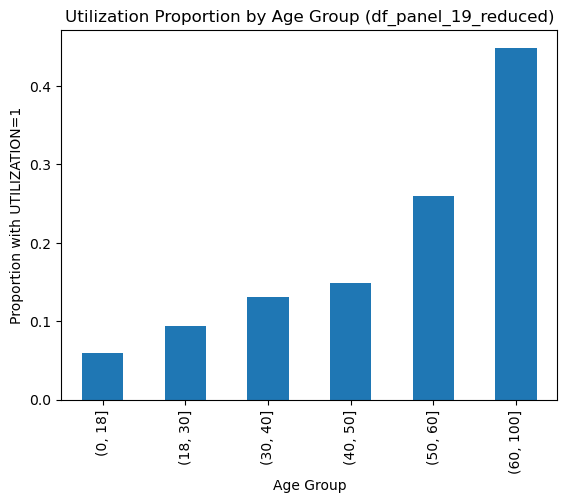

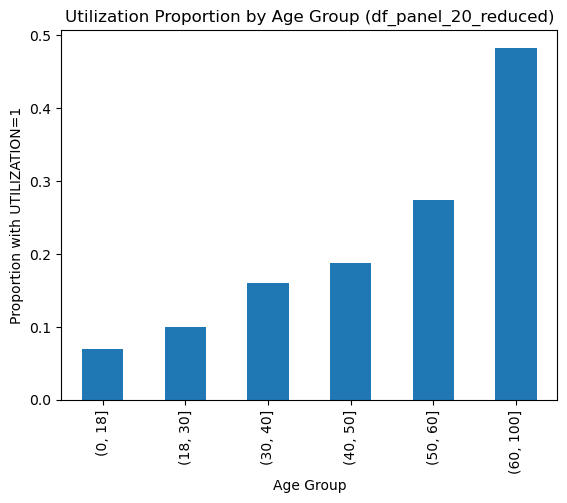

In [44]:
# The following code plots the proportion for age groups that have utilization for df_panel_19_reduced:
utilization_1 = df_panel_19_reduced[df_panel_19_reduced['UTILIZATION'] == 1]

age_groups = utilization_1.groupby(pd.cut(utilization_1['AGE'], bins=[0, 18, 30, 40, 50, 60, 100]))
proportions = age_groups.size() / df_panel_19_reduced.groupby(pd.cut(df_panel_19_reduced['AGE'], bins=[0, 18, 30, 40, 50, 60, 100])).size()

proportions.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Proportion with UTILIZATION=1')
plt.title('Utilization Proportion by Age Group (df_panel_19_reduced)')
plt.show()

# The following code plots the proportion for age groups that have utilization for df_panel_20_reduced:
utilization_1 = df_panel_20_reduced[df_panel_20_reduced['UTILIZATION'] == 1]

age_groups = utilization_1.groupby(pd.cut(utilization_1['AGE'], bins=[0, 18, 30, 40, 50, 60, 100]))
proportions = age_groups.size() / df_panel_19_reduced.groupby(pd.cut(df_panel_19_reduced['AGE'], bins=[0, 18, 30, 40, 50, 60, 100])).size()

proportions.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Proportion with UTILIZATION=1')
plt.title('Utilization Proportion by Age Group (df_panel_20_reduced)')
plt.show()

***Correlation between different features and our target variable: Utilization***

Age vs. Utilization

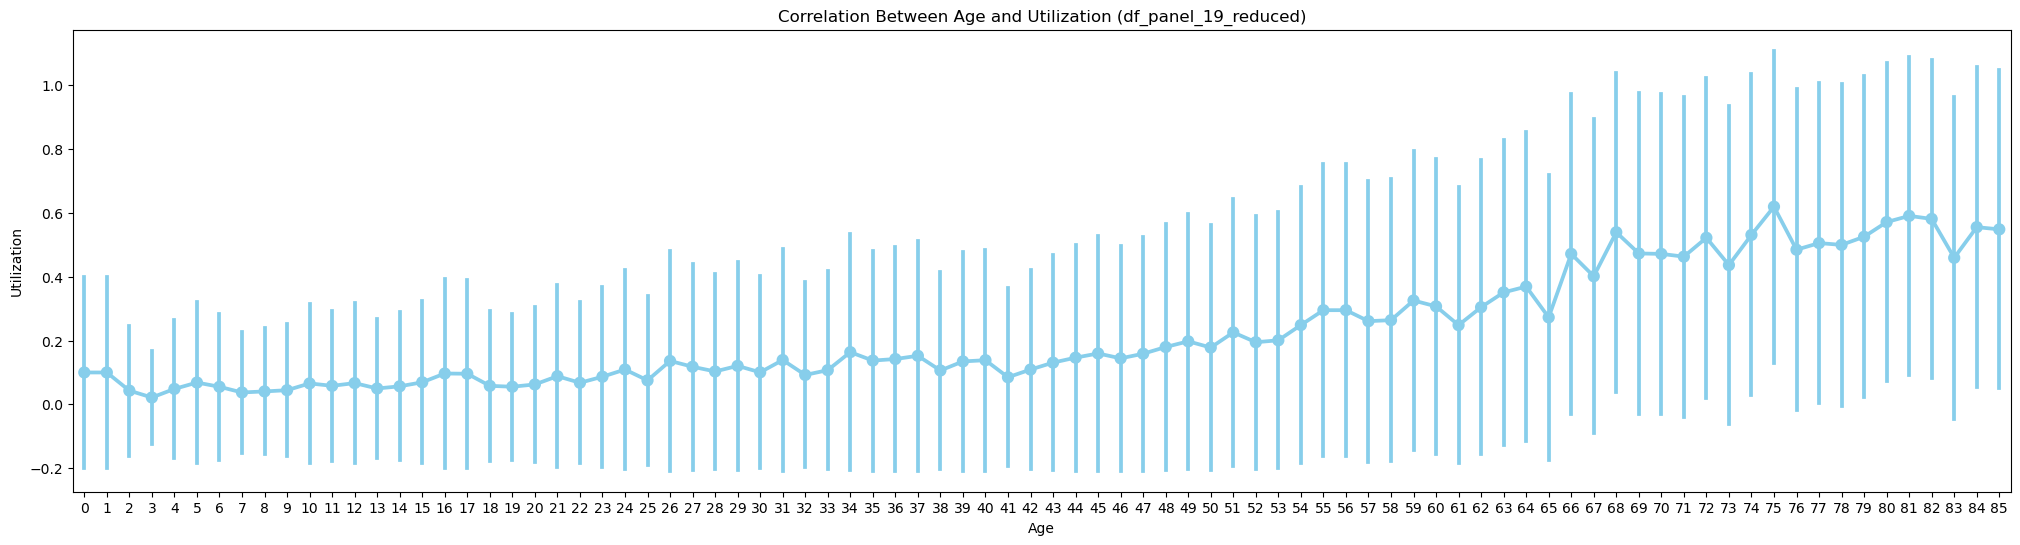

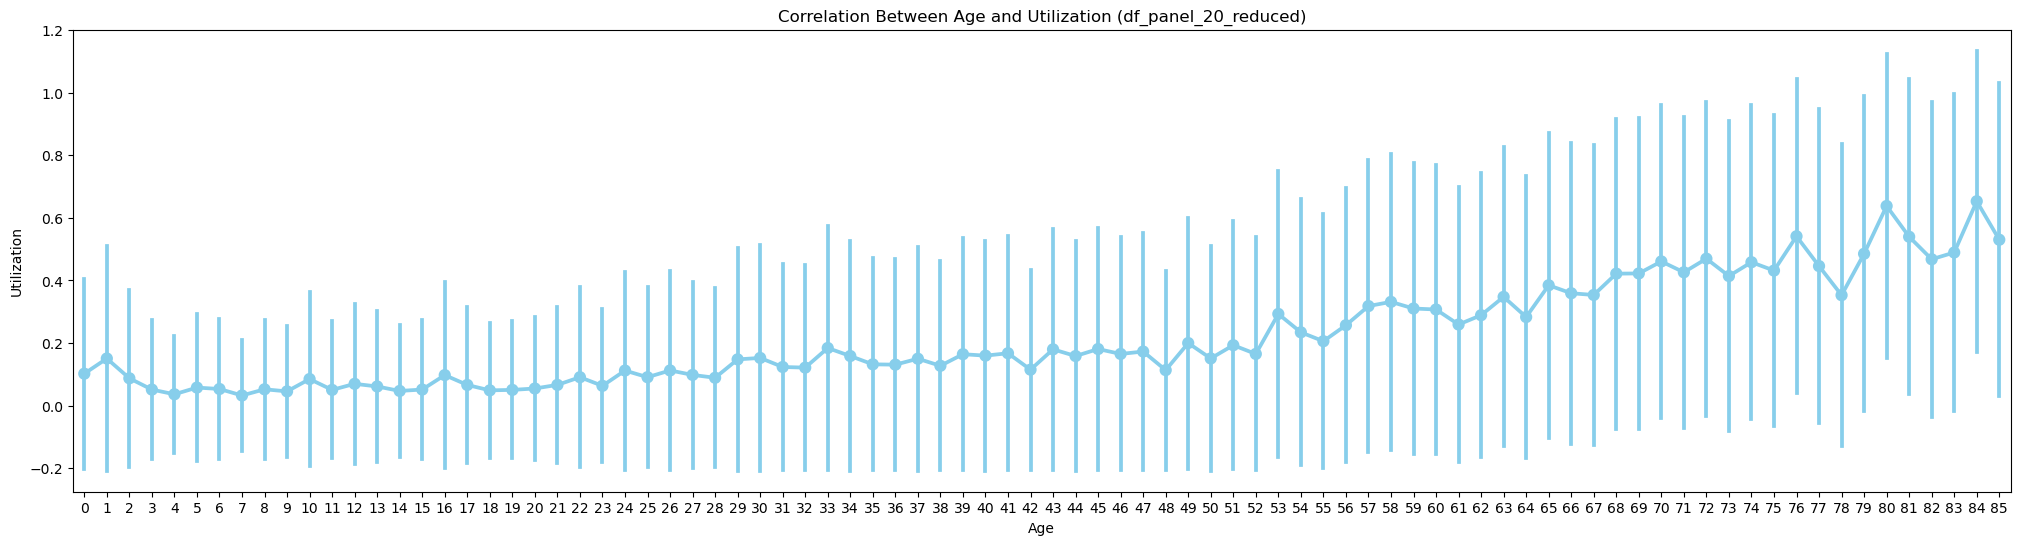

In [53]:
# Next, I thought it would be useful to look at the correlation between age and utilization to get an 
# initial sense of if one may influence the other. (Additionally, I incorporated
# a standard-deviation based confidence interval on the plots below so that we can get an idea of the 
# liklihood of seeing that same data point in the true population. 

# The following code plots the correlation between age and utilization for df_panel_19_reduced:
plt.figure(figsize=(25, 6)) 
sns.pointplot(data=df_panel_19_reduced, x="AGE", y="UTILIZATION", color='skyblue', errorbar="sd")

plt.title("Correlation Between Age and Utilization (df_panel_19_reduced)")
plt.xlabel("Age")
plt.ylabel("Utilization")

plt.show()

# The following code plots the correlation between age and utilization for df_panel_20_reduced:
plt.figure(figsize=(25, 6)) 
sns.pointplot(data=df_panel_20_reduced, x="AGE", y="UTILIZATION", color='skyblue', errorbar="sd")

plt.title("Correlation Between Age and Utilization (df_panel_20_reduced)")
plt.xlabel("Age")
plt.ylabel("Utilization")

plt.show()

Cancer/Malignancy diagnosis vs. Utilization

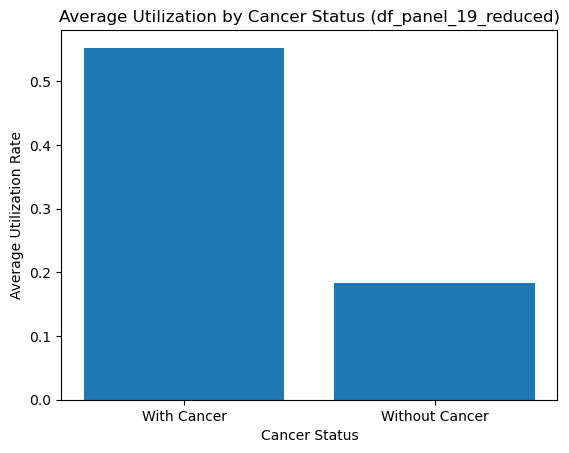

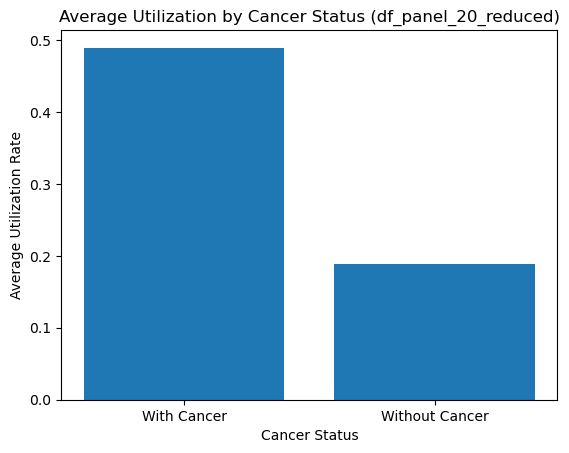

In [46]:
# Lastly, I thought it would be useful to look at the correlation between utilization and cancer/malignancy diagnosis (CANCERDX) to get an initial sense of it one may influence the other.
# (Note: It's clear that people w/ cancer would have a higher utilization rate than people w/out but I wanted to investogate this further to see if people who utilize preventive care more get cancer
# at the same rate as people who don't utilize preventive care as much but I wasn't sure if there was a column for that).

# The following code plots bar charts comparing average utilization for CANCERDX and non-CANCERDX for df_panel_19_reduced:
cancer_group = df_panel_19_reduced[df_panel_19_reduced['CANCERDX'] == 1]

no_cancer_group = df_panel_19_reduced[df_panel_19_reduced['CANCERDX'] == 2]

cancer_utilization_rate = cancer_group['UTILIZATION'].mean()
no_cancer_utilization_rate = no_cancer_group['UTILIZATION'].mean()

categories = ['With Cancer', 'Without Cancer']
utilization_rates = [cancer_utilization_rate, no_cancer_utilization_rate]

plt.bar(categories, utilization_rates)
plt.xlabel('Cancer Status')
plt.ylabel('Average Utilization Rate')
plt.title('Average Utilization by Cancer Status (df_panel_19_reduced)')

plt.show()

# The following code plots bar charts comparing average utilization for CANCERDX and non-CANCERDX for df_panel_20_reduced:
cancer_group = df_panel_20_reduced[df_panel_20_reduced['CANCERDX'] == 1]

no_cancer_group = df_panel_20_reduced[df_panel_20_reduced['CANCERDX'] == 2]

cancer_utilization_rate = cancer_group['UTILIZATION'].mean()
no_cancer_utilization_rate = no_cancer_group['UTILIZATION'].mean()

categories = ['With Cancer', 'Without Cancer']
utilization_rates = [cancer_utilization_rate, no_cancer_utilization_rate]

plt.bar(categories, utilization_rates)
plt.xlabel('Cancer Status')
plt.ylabel('Average Utilization Rate')
plt.title('Average Utilization by Cancer Status (df_panel_20_reduced)')

plt.show()

#### 2.5 Other analysis

In [17]:
#Analyzing Race for Algorithmic Fairness: Will Lower Non-White Population Affect Our Analysis?
df_panel_19_reduced

,REGION,AGE,SEX,RACE,MARRY,FTSTU,ACTDTY,HONRDC,RTHLTH,MNHLTH,...,ADSMOK42,PCS42,MCS42,K6SUM42,PHQ242,EMPST,POVCAT,INSCOV,UTILIZATION,PERWT15F
0,2,53,1,White,5,-1,2,2,4,3,...,2,25.93,58.47,3,0,4,1,2,1,21854.981705
1,2,56,2,White,3,-1,2,2,4,3,...,2,20.42,26.57,17,6,4,3,2,1,18169.604822
3,2,23,2,White,5,3,2,2,1,1,...,2,53.12,50.33,7,0,1,2,2,0,17191.832515
4,2,3,1,White,6,-1,3,3,1,3,...,-1,-1.00,-1.00,-1,-1,-1,2,2,0,20261.485463
5,3,27,1,Non-White,1,-1,1,4,2,1,...,-1,-1.00,-1.00,-1,-1,1,3,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16573,3,25,1,Non-White,1,-1,2,2,1,1,...,2,56.71,62.39,0,0,1,1,1,0,4111.315754
16574,3,25,2,Non-White,1,-1,2,2,1,1,...,2,56.71,62.39,0,0,4,1,1,0,5415.228173
16575,3,2,2,White,6,-1,3,3,1,1,...,-1,-1.00,-1.00,-1,-1,-1,1,2,0,3896.116219
16576,1,54,2,Non-White,3,-1,2,2,1,1,...,2,43.97,42.45,24,0,1,3,2,0,4883.851005


In [18]:
race_counts = df_panel_19_reduced['RACE'].value_counts()
race_counts

RACE
Non-White    10174
White         5656
Name: count, dtype: int64

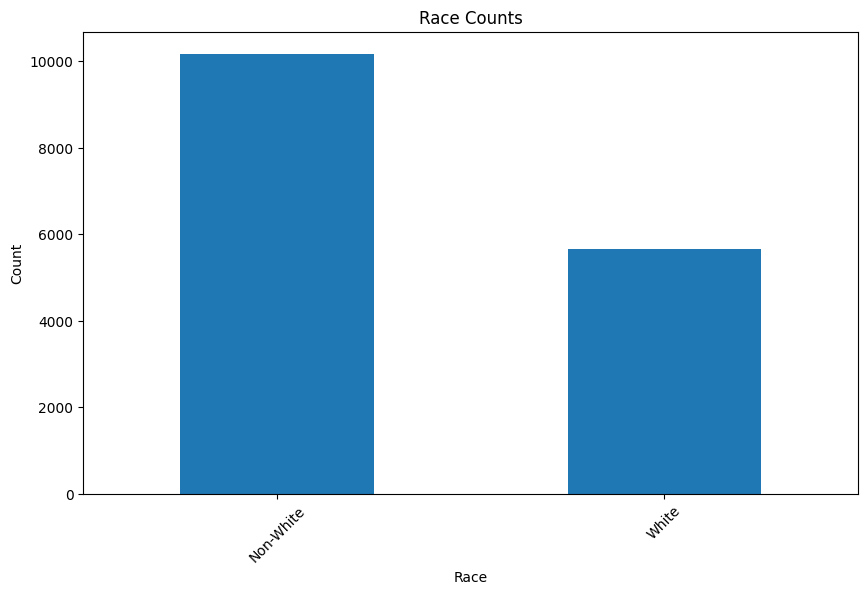

In [19]:
race_counts = df_panel_19_reduced['RACE'].value_counts()

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Counts')
plt.xticks(rotation=45)

plt.show()

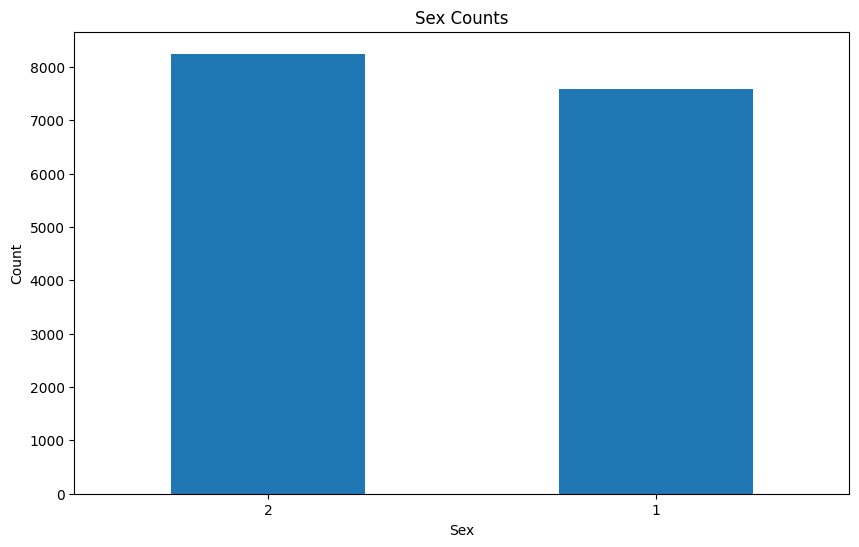

In [20]:
#Analyzing Sex for Algorithmic Fairness: Will the difference in counts for sex affect our model?
sex_counts = df_panel_19_reduced['SEX'].value_counts()

plt.figure(figsize=(10, 6))
sex_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Counts')
plt.xticks(rotation=0)  # No rotation needed for sex labels

plt.show()

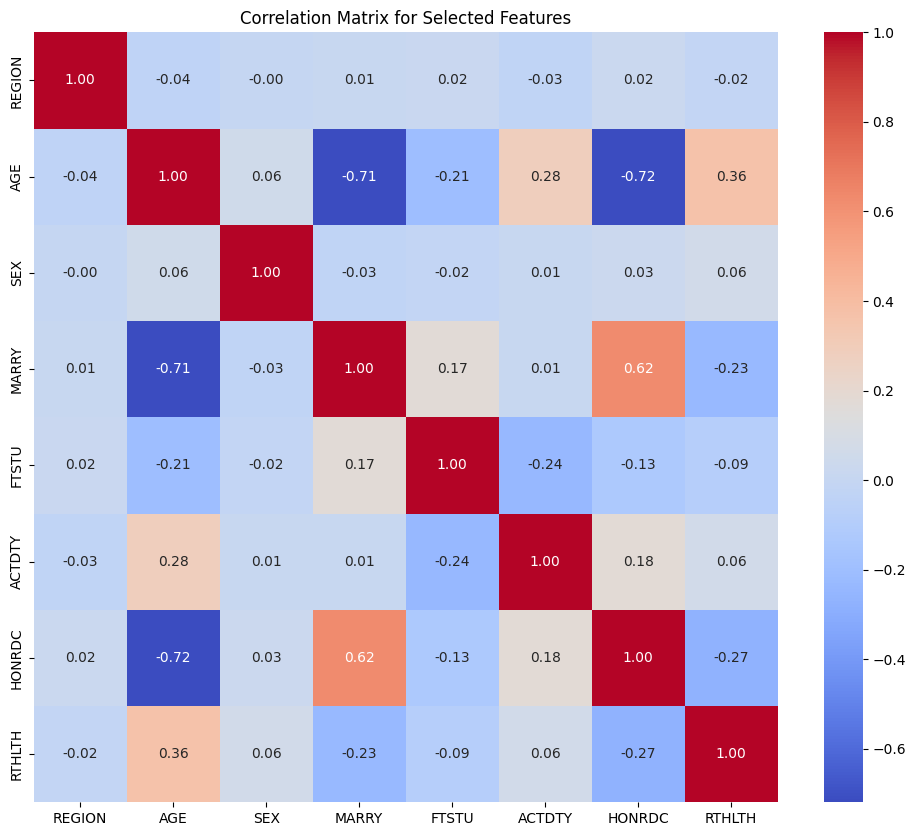

In [21]:
# Correlation matrix for chosen features
features = ['REGION', 'AGE', 'SEX', 'MARRY',
                                 'FTSTU','ACTDTY','HONRDC','RTHLTH'] 
selected_features = df_panel_19_reduced[features]

# Calculated the correlation matrix
correlation_matrix = selected_features.corr()

# Created a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()

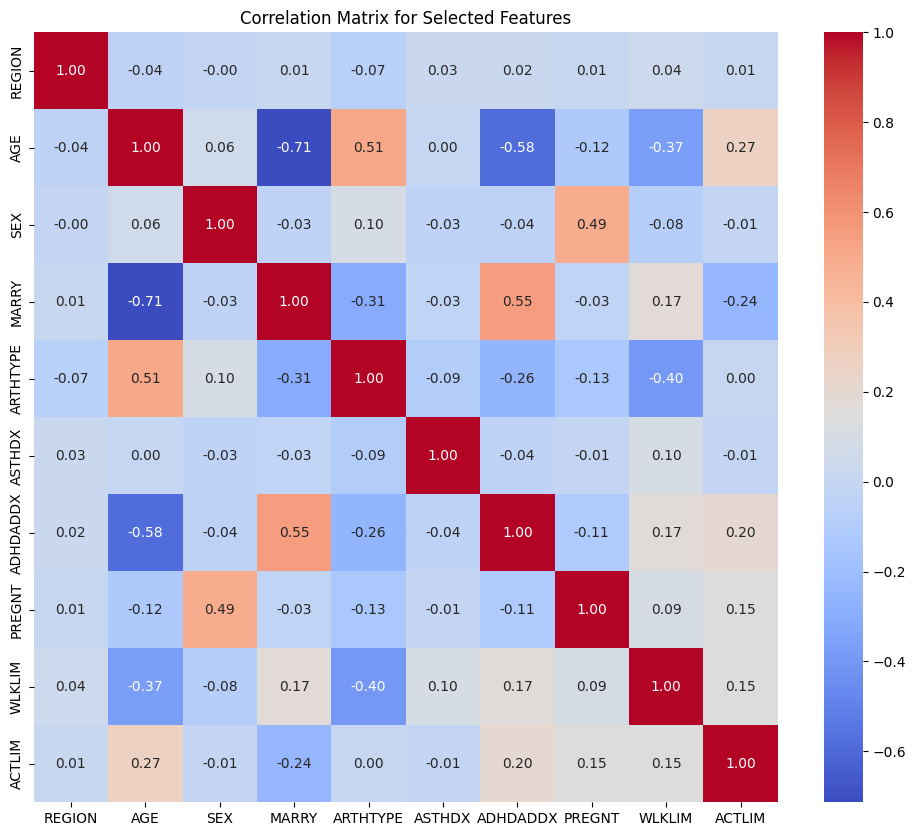

In [22]:
# Correlation matrix for additional features
features2 = ['REGION', 'AGE', 'SEX', 'MARRY','ARTHTYPE','ASTHDX','ADHDADDX','PREGNT','WLKLIM',
                                 'ACTLIM'] 
selected_features2 = df_panel_19_reduced[features2]

# Calculated the correlation matrix
correlation_matrix2 = selected_features2.corr()

# Created a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()


### End of Replication Part 01 -  EDA


-----
# Start of Replication Part 02 -  Model Development, and Fairness Evaluation

## There are **two** components to `Replication Project Part #02`
1. Training models without de-biasing, using IBM's tutorial
2. Training models without de-biasing, using your own model development techniques including (1) Feature Selection, (2) Encoding, (3) Binning Features, and other items 

#### We will now return to IBM AIF360's [Medical Expenditure Tutorial](https://urldefense.com/v3/__https://nbviewer.org/github/IBM/AIF360/blob/master/examples/tutorial_medical_expenditure.ipynb__;!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoClIhRgF2w$ ) 
_*Note that it is primarily Scikit-learn based_

* A reminder, you will need to fork [AIF360's repository](https://urldefense.com/v3/__https://github.com/Trusted-AI/AIF360__;!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoClZYlhtCA$ ) into your own GitHub and access the notebook locally or via your method of choice
* AIF360's Repository can be found under: `AIF360`/`Examples`/tutorial_medical_expenditure.ipynb
* Ensure you have your `aif360` environment turned and activated using a miniconda prompt
* Use Jupyter Labs
* Refer to [Week 03](https://urldefense.com/v3/__https://nanrahman.github.io/capstone-responsible-ai/weeks/03-Replication-Part-00/__;!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoCnWxEWbew$ ) content on the course Website to access the `Quickstart Guide`






### [3.](#Table-of-Contents) Model Development without Debiasing 


First, load all necessary packages

In [23]:
import sys
sys.path.insert(0, '../')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display

# Datasets
from aif360.datasets import MEPSDataset19
from aif360.datasets import MEPSDataset20
from aif360.datasets import MEPSDataset21

# Fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

# Explainers
from aif360.explainers import MetricTextExplainer

# Scalers
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Bias mitigation techniques
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import PrejudiceRemover

# LIME
from aif360.datasets.lime_encoder import LimeEncoder
import lime
from lime.lime_tabular import LimeTabularExplainer

np.random.seed(1)

### 3.1. Load data & create splits for learning/validating/testing model

In [24]:
label_name='UTILIZATION'
favorable_classes=[1]
protected_attribute_names=['RACE']
privileged_classes=[[1]]
instance_weights_name='PERWT15F'
scores_name=''
categorical_features=['REGION', 'SEX', 'MARRY', \
                      'FTSTU', 'ACTDTY', 'HONRDC', 'RTHLTH', 'MNHLTH', 'HIBPDX', 'CHDDX', 'ANGIDX', 
                      'MIDX', 'OHRTDX', 'STRKDX', 'EMPHDX', 'CHBRON', 'CHOLDX', 'CANCERDX', 'DIABDX', 
                      'JTPAIN', 'ARTHDX', 'ARTHTYPE', 'ASTHDX', 'ADHDADDX', 'PREGNT', 'WLKLIM', 
                      'ACTLIM', 'SOCLIM', 'COGLIM', 'DFHEAR42', 'DFSEE42', 'ADSMOK42', 'PHQ242', 
                      'EMPST', 'POVCAT', 'INSCOV']
features_to_keep=['REGION', 'AGE', 'SEX', 'RACE', 'MARRY', \
                  'FTSTU', 'ACTDTY', 'HONRDC', 'RTHLTH', 'MNHLTH', 'HIBPDX', 'CHDDX', 'ANGIDX', 
                  'MIDX', 'OHRTDX', 'STRKDX', 'EMPHDX', 'CHBRON', 'CHOLDX', 'CANCERDX', 'DIABDX', 
                  'JTPAIN', 'ARTHDX', 'ARTHTYPE', 'ASTHDX', 'ADHDADDX', 'PREGNT', 'WLKLIM', 
                  'ACTLIM', 'SOCLIM', 'COGLIM', 'DFHEAR42', 'DFSEE42', 'ADSMOK42',
                  'PCS42', 'MCS42', 'K6SUM42', 'PHQ242', 'EMPST', 'POVCAT', 'INSCOV', 'UTILIZATION', 'PERWT15F']
features_to_drop=[]
na_values=[]
custom_preprocessing=None
metadata={'label_maps': [{1: '>= 10 Visits', 0: '< 10 Visits'}], 'protected_attribute_maps': [{1: 'White', 0: 'Non-White'}]}

In [25]:
# combine panel 19 and 20 raw data
X = pd.concat([df_panel_19, df_panel_20], ignore_index=True)

# White and Non-White to 1 and 0 (change to default_mappings)
X = X.replace({'White':1, 'Non-White':0})

dataset = StandardDataset(X, label_name, favorable_classes, protected_attribute_names, privileged_classes, \
                          instance_weights_name, scores_name, categorical_features, features_to_keep, features_to_drop, \
                          na_values, custom_preprocessing, metadata)

(dataset_orig_panel19_train,
 dataset_orig_panel19_val,
 dataset_orig_panel19_test) = dataset.split([0.5, 0.8], shuffle=True)

sens_ind = 0
sens_attr = dataset_orig_panel19_train.protected_attribute_names[sens_ind]

unprivileged_groups = [{sens_attr: v} for v in
                       dataset_orig_panel19_train.unprivileged_protected_attributes[sens_ind]]
privileged_groups = [{sens_attr: v} for v in
                     dataset_orig_panel19_train.privileged_protected_attributes[sens_ind]]

In [26]:
# Gives info about the provided dataset
def describe(train=None, val=None, test=None):
    if train is not None:
        display(Markdown("#### Training Dataset shape"))
        print(train.features.shape)
    if val is not None:
        display(Markdown("#### Validation Dataset shape"))
        print(val.features.shape)
    display(Markdown("#### Test Dataset shape"))
    print(test.features.shape)
    display(Markdown("#### Favorable and unfavorable labels"))
    print(test.favorable_label, test.unfavorable_label)
    display(Markdown("#### Protected attribute names"))
    print(test.protected_attribute_names)
    display(Markdown("#### Privileged and unprivileged protected attribute values"))
    print(test.privileged_protected_attributes, 
          test.unprivileged_protected_attributes)
    display(Markdown("#### Dataset feature names"))
    print(test.feature_names)

In [27]:
describe(dataset_orig_panel19_train, dataset_orig_panel19_val, dataset_orig_panel19_test)

#### Training Dataset shape

(16700, 138)


#### Validation Dataset shape

(10020, 138)


#### Test Dataset shape

(6680, 138)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['RACE']


#### Privileged and unprivileged protected attribute values

[array([1.])] [array([0.])]


#### Dataset feature names

['AGE', 'RACE', 'PCS42', 'MCS42', 'K6SUM42', 'REGION=1', 'REGION=2', 'REGION=3', 'REGION=4', 'SEX=1', 'SEX=2', 'MARRY=1', 'MARRY=2', 'MARRY=3', 'MARRY=4', 'MARRY=5', 'MARRY=6', 'MARRY=7', 'MARRY=8', 'MARRY=9', 'MARRY=10', 'FTSTU=-1', 'FTSTU=1', 'FTSTU=2', 'FTSTU=3', 'ACTDTY=1', 'ACTDTY=2', 'ACTDTY=3', 'ACTDTY=4', 'HONRDC=1', 'HONRDC=2', 'HONRDC=3', 'HONRDC=4', 'RTHLTH=-1', 'RTHLTH=1', 'RTHLTH=2', 'RTHLTH=3', 'RTHLTH=4', 'RTHLTH=5', 'MNHLTH=-1', 'MNHLTH=1', 'MNHLTH=2', 'MNHLTH=3', 'MNHLTH=4', 'MNHLTH=5', 'HIBPDX=-1', 'HIBPDX=1', 'HIBPDX=2', 'CHDDX=-1', 'CHDDX=1', 'CHDDX=2', 'ANGIDX=-1', 'ANGIDX=1', 'ANGIDX=2', 'MIDX=-1', 'MIDX=1', 'MIDX=2', 'OHRTDX=-1', 'OHRTDX=1', 'OHRTDX=2', 'STRKDX=-1', 'STRKDX=1', 'STRKDX=2', 'EMPHDX=-1', 'EMPHDX=1', 'EMPHDX=2', 'CHBRON=-1', 'CHBRON=1', 'CHBRON=2', 'CHOLDX=-1', 'CHOLDX=1', 'CHOLDX=2', 'CANCERDX=-1', 'CANCERDX=1', 'CANCERDX=2', 'DIABDX=-1', 'DIABDX=1', 'DIABDX=2', 'JTPAIN=-1', 'JTPAIN=1', 'JTPAIN=2', 'ARTHDX=-1', 'ARTHDX=1', 'ARTHDX=2', 'ARTHTYPE=-1'

In [28]:
# Shows the disparate impact between priveleged and unpriveleged groups within the original dataset
metric_orig_panel19_train = BinaryLabelDatasetMetric(
        dataset_orig_panel19_train,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups)
explainer_orig_panel19_train = MetricTextExplainer(metric_orig_panel19_train)

print(explainer_orig_panel19_train.disparate_impact())

Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.6488702105224134


### 3.2. Learning a Logistic Regression (LR) classifier on original data

In [29]:
dataset = dataset_orig_panel19_train
model = make_pipeline(StandardScaler(),
                      LogisticRegression(solver='liblinear', random_state=1))
fit_params = {'logisticregression__sample_weight': dataset.instance_weights}

lr_orig_panel19 = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)

In [30]:
from collections import defaultdict

# Thresh_arr is potential thresholds for each probability the model predicts
# (what cutoff do we use to determine if someone is likely to have high utilization?)
def test(dataset, model, thresh_arr):
    try:
        # sklearn classifier
        y_val_pred_prob = model.predict_proba(dataset.features)
        pos_ind = np.where(model.classes_ == dataset.favorable_label)[0][0]
    except AttributeError:
        # aif360 inprocessing algorithm
        y_val_pred_prob = model.predict(dataset).scores
        pos_ind = 0
    
    metric_arrs = defaultdict(list)
    # Finds the fairness metrics corresponding to the use of each given threshold
    for thresh in thresh_arr:
        y_val_pred = (y_val_pred_prob[:, pos_ind] > thresh).astype(np.float64)

        dataset_pred = dataset.copy()
        dataset_pred.labels = y_val_pred
        metric = ClassificationMetric(
                dataset, dataset_pred,
                unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)

        metric_arrs['bal_acc'].append((metric.true_positive_rate()
                                     + metric.true_negative_rate()) / 2)
        metric_arrs['avg_odds_diff'].append(metric.average_odds_difference())
        metric_arrs['disp_imp'].append(metric.disparate_impact())
        metric_arrs['stat_par_diff'].append(metric.statistical_parity_difference())
        metric_arrs['eq_opp_diff'].append(metric.equal_opportunity_difference())
        metric_arrs['theil_ind'].append(metric.theil_index())
    
    return metric_arrs

In [31]:
# linspace of potential thresholds to be used
thresh_arr = np.linspace(0.01, 0.5, 50)
# Big list of all the results per metric per threshold
val_metrics = test(dataset=dataset_orig_panel19_val,
                   model=lr_orig_panel19,
                   thresh_arr=thresh_arr)
# Index of threshold that provides the best balanced accuracy
lr_orig_best_ind = np.argmax(val_metrics['bal_acc'])

In [32]:
# val_metrics

In [33]:
def plot(x, x_name, y_left, y_left_name, y_right, y_right_name):
    fig, ax1 = plt.subplots(figsize=(10,7))
    ax1.plot(x, y_left)
    ax1.set_xlabel(x_name, fontsize=16, fontweight='bold')
    ax1.set_ylabel(y_left_name, color='b', fontsize=16, fontweight='bold')
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    ax1.set_ylim(0.5, 0.8)

    ax2 = ax1.twinx()
    ax2.plot(x, y_right, color='r')
    ax2.set_ylabel(y_right_name, color='r', fontsize=16, fontweight='bold')
    if 'DI' in y_right_name:
        ax2.set_ylim(0., 0.7)
    else:
        ax2.set_ylim(-0.25, 0.1)

    best_ind = np.argmax(y_left)
    ax2.axvline(np.array(x)[best_ind], color='k', linestyle=':')
    ax2.yaxis.set_tick_params(labelsize=14)
    ax2.grid(True)

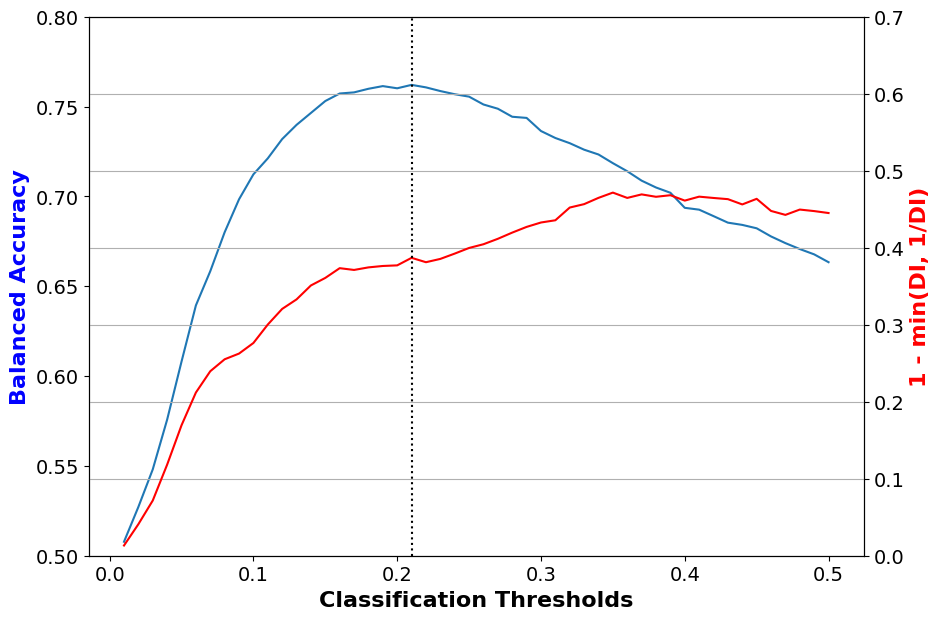

In [34]:
disp_imp = np.array(val_metrics['disp_imp'])
disp_imp_err = 1 - np.minimum(disp_imp, 1/disp_imp)
plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     disp_imp_err, '1 - min(DI, 1/DI)')

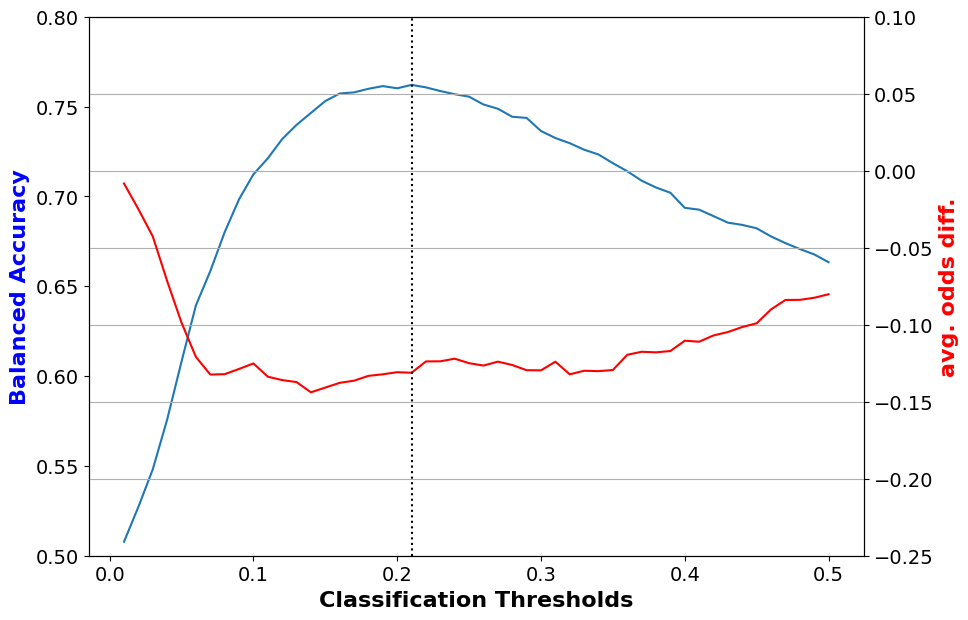

In [35]:
plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     val_metrics['avg_odds_diff'], 'avg. odds diff.')

In [36]:
def describe_metrics(metrics, thresh_arr):
    best_ind = np.argmax(metrics['bal_acc'])
    print("Threshold corresponding to Best balanced accuracy: {:6.4f}".format(thresh_arr[best_ind]))
    print("Best balanced accuracy: {:6.4f}".format(metrics['bal_acc'][best_ind]))
#     disp_imp_at_best_ind = np.abs(1 - np.array(metrics['disp_imp']))[best_ind]
    disp_imp_at_best_ind = 1 - min(metrics['disp_imp'][best_ind], 1/metrics['disp_imp'][best_ind])
    print("Corresponding 1-min(DI, 1/DI) value: {:6.4f}".format(disp_imp_at_best_ind))
    print("Corresponding average odds difference value: {:6.4f}".format(metrics['avg_odds_diff'][best_ind]))
    print("Corresponding statistical parity difference value: {:6.4f}".format(metrics['stat_par_diff'][best_ind]))
    print("Corresponding equal opportunity difference value: {:6.4f}".format(metrics['eq_opp_diff'][best_ind]))
    print("Corresponding Theil index value: {:6.4f}".format(metrics['theil_ind'][best_ind]))

In [37]:
describe_metrics(val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.2100
Best balanced accuracy: 0.7621
Corresponding 1-min(DI, 1/DI) value: 0.3869
Corresponding average odds difference value: -0.1312
Corresponding statistical parity difference value: -0.1707
Corresponding equal opportunity difference value: -0.1192
Corresponding Theil index value: 0.0912


In [38]:
lr_orig_metrics = test(dataset=dataset_orig_panel19_test,
                       model=lr_orig_panel19,
                       thresh_arr=[thresh_arr[lr_orig_best_ind]])

In [39]:
describe_metrics(lr_orig_metrics, [thresh_arr[lr_orig_best_ind]])

Threshold corresponding to Best balanced accuracy: 0.2100
Best balanced accuracy: 0.7505
Corresponding 1-min(DI, 1/DI) value: 0.4000
Corresponding average odds difference value: -0.1457
Corresponding statistical parity difference value: -0.1839
Corresponding equal opportunity difference value: -0.1496
Corresponding Theil index value: 0.0957


### 3.3. Learning a Random Forest (RF) classifier on original data

In [40]:
dataset = dataset_orig_panel19_train
model = make_pipeline(StandardScaler(),
                      RandomForestClassifier(n_estimators=500, min_samples_leaf=25))
fit_params = {'randomforestclassifier__sample_weight': dataset.instance_weights}
rf_orig_panel19 = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)

In [41]:
# linspace of potential thresholds to be used
thresh_arr = np.linspace(0.01, 0.5, 50)
# Big list of all the results per metric per threshold
val_metrics = test(dataset=dataset_orig_panel19_val,
                   model=rf_orig_panel19,
                   thresh_arr=thresh_arr)
# Index of threshold that provides the best balanced accuracy
rf_orig_best_ind = np.argmax(val_metrics['bal_acc'])

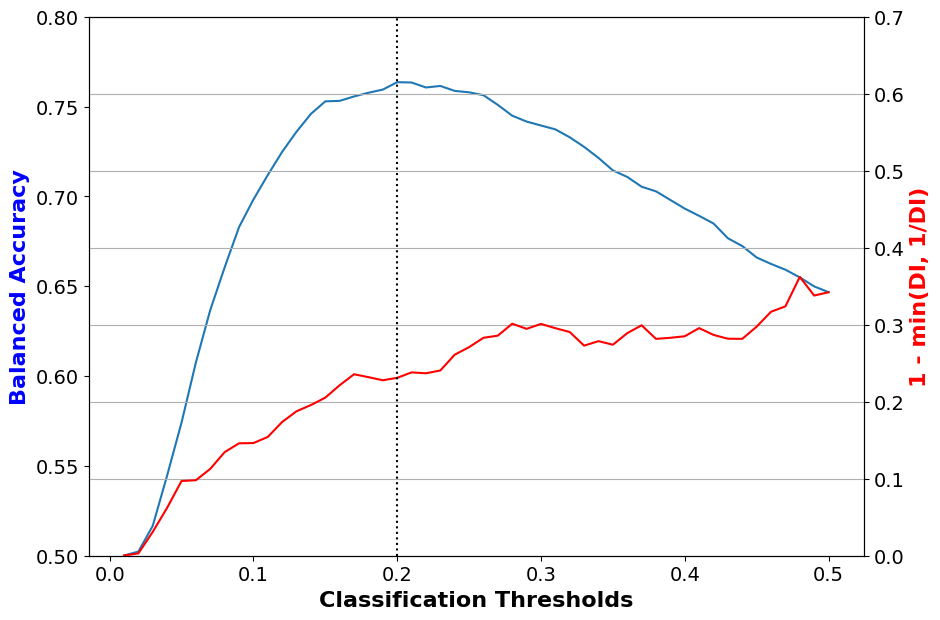

In [42]:
disp_imp = np.array(val_metrics['disp_imp'])
disp_imp_err = 1 - np.minimum(disp_imp, 1/disp_imp)
plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     disp_imp_err, '1 - min(DI, 1/DI)')

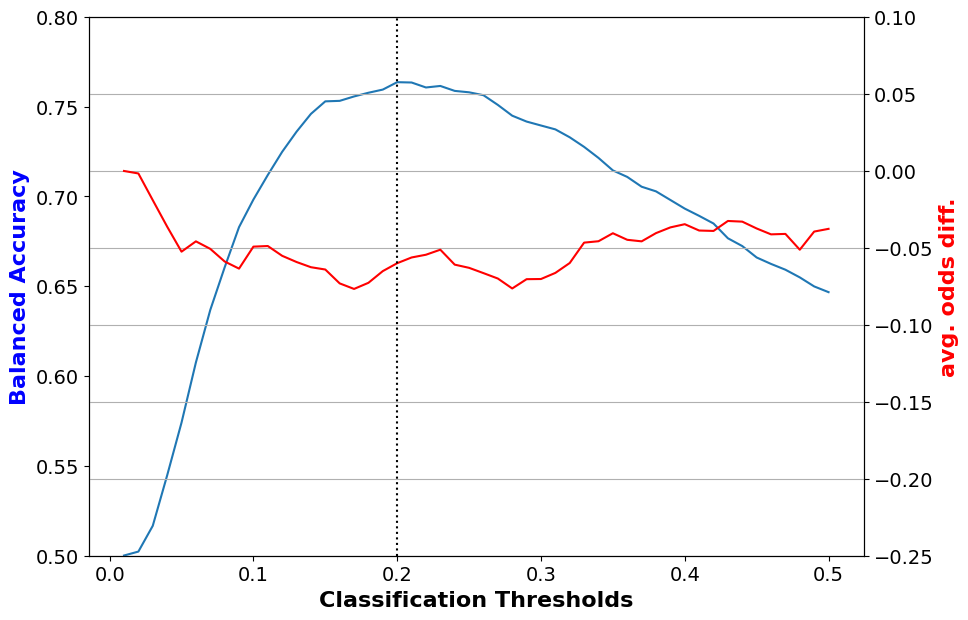

In [43]:
plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     val_metrics['avg_odds_diff'], 'avg. odds diff.')

In [44]:
describe_metrics(val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.2000
Best balanced accuracy: 0.7636
Corresponding 1-min(DI, 1/DI) value: 0.2310
Corresponding average odds difference value: -0.0600
Corresponding statistical parity difference value: -0.1016
Corresponding equal opportunity difference value: -0.0454
Corresponding Theil index value: 0.0881


In [45]:
# Metrics on original dataset
rf_orig_metrics = test(dataset=dataset_orig_panel19_test,
                       model=rf_orig_panel19,
                       thresh_arr=[thresh_arr[rf_orig_best_ind]])

In [46]:
describe_metrics(rf_orig_metrics, [thresh_arr[rf_orig_best_ind]])

Threshold corresponding to Best balanced accuracy: 0.2000
Best balanced accuracy: 0.7558
Corresponding 1-min(DI, 1/DI) value: 0.2901
Corresponding average odds difference value: -0.0894
Corresponding statistical parity difference value: -0.1393
Corresponding equal opportunity difference value: -0.0729
Corresponding Theil index value: 0.0914


### Section 3 Write Up here

### Part-01: For **both** the logistic regression and random forest classifiers learned on the original data, please include explain the results of your fairness metrics. For _each_ metric result briefly describe what this value means in 1-2 sentences (is it fair, is it not fair? Why?)

**Fairness Metric Summary** 
* Threshold corresponding to Best balanced accuracy: 0.1900 LR / 0.2300 RF
    * Threshold is a hyperparameter used to assign the data to labels/outputs, and these values correspond to the thresholds that result in the highest balanced accuracy for the models, meaning they are the optimal thresholds. These thresholds are not fair because the optimal thresholds result in a higher balanced accuracy (0.7627 LR / 0.7640 RF) than the corresponding disparate/fairness metric (0.6066 LR / 0.5040 RF).
* Best balanced accuracy: 0.7627 LR / 0.7640 RF
    * This metric refers to  the overall accuracy of the models and does not consider the privileged vs. unprivileged group. The balanced accuracy is more fair than regular accuracy, because it has the use case of unbalanced data.
* Corresponding 1-min(DI, 1/DI) value: 0.6066 LR / 0.5040 RF
    * Disparate Impact (DI) is the probability of success given the unprivileged group, divided by the probability of success given the privileged group, but is rewritten as 1 - min(DI, 1/DI) here to convert it to a proportion, since the DI can be greater than 1 if the privileged group has a less chance of success. For both the logistic regression and random forest models, this value is unfair because it should be close to 0 if both groups have the same probability of success.
* Corresponding average odds difference value: -0.1831 LR / -0.1346 RF
    * This is the average of the difference in false positive rates and true positive rates between the unprivileged and privileged groups, which should be 0 if the both groups are receiving false positive errors at the same rate. Since the metric is less than 0 for both the logistic regression and random forest models, these values are not fair because the groups do not receive errors equally.
* Corresponding statistical parity difference value: -0.2643 LR / -0.2121 RF
    * Ideally, the statistical parity difference should be 0 because that would mean there is no difference between the 2 groups. For both the logistic regression and random forest models, the statistical parity difference is less than 0, meaning there is a higher benefit for the privileged group, so both models are unfair.
* Corresponding equal opportunity difference value: -0.1608 LR / -0.1141 RF
    * This is the difference in recall scores (measuring true positive rates) between the unprivileged and privileged groups, with a score of 0 meaning both groups have equal opportunity. Both the logistic regression and random forest models yield an unfair score since they are both less than 0.
* Corresponding Theil index value: 0.0936 LR / 0.0944 RF
    * The Theil index value measures across the groups to determine inequality. For both the logistic regression and random forest models, the values are similar around 0.09, which is quite low and close to 0 (indicating low inequality, and thus fairness).


### Part-02: Please write one paragraph for each question.
1. How can we determine which metrics to use, given our data and use case? You can refer to [Course material](https://urldefense.com/v3/__https://nanrahman.github.io/capstone-responsible-ai/weeks/06-Fairness-Assessments/__;!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoCnNzgtYfQ$ ), online research and Guidance provided by [AIF360](https://urldefense.com/v3/__http://aif360.mybluemix.net/resources*)*5Cn__;IyU!!Mih3wA!E6R3WTjF8uOSRKa_PM8Z97mLuF-BH6xWocDPPgy_ELvf_dKDxq0GpqinPbKM9QLxyg_ZOOgeoCmtCnbVFg$
   * We can determine what metrics to use by considering the context the model is deployed in. Given our MEPS data, the model will be used in healthcare to predict utilization rates. Our sensitive attribute here is race, which determines our privileged and unprivileged groups. The data should be examined to see if there are any imbalances between groups, since those can affect the fairness metrics as model performance often depends on the dataset it is trained on. For example, the balanced accuracy metric can help mitigate the imbalanced data issue. Looking at the context, one should consider if predicting the positive class is important in the model. Several metrics including the equal opportunity difference and average odds difference look at the rates for true positives and false positives, making them good choices if predicting the positive class has a strong impact on an individual. To decide between metrics, trade-offs should also be considered. Correcting for biases may increase the accuracy of the model, but also have the potential to lower it.
2. When you have competing fairness metrics, how to pick which to prioritize?
   * In the context of healthcare, having accurate results is important, but so there is also the ethical consideration of treating different groups fairly and equitably. There is a potential trade-off between accuracy and fairness, so the metrics used are largely dependent on what value the stakeholders prioritize.
3. What do you do when you encounter different definitions for similar metrics?
    * When we encounter different definitions for similar metrics, it is good practice to reference a standardized definition. To interpret the metrics, we referenced AIF360’s classification metric documentation which lists the mathematical formulas used to get the metric as well as a description. Additionally, plotting out some of the metrics, as we did using the different thresholds and various fairness metrics (e.g., average odds difference) can visualize the difference between groups, supporting the definitions in the documentation as the space between the curves illustrates disparities.

4. Based on this, which model and fairness metric appears the best to proceed with?
   * Based on this, the random forest model appears best to proceed with because many of its metrics (e.g., equal opportunity difference, statistical parity difference, average odds difference) are closer to 0 than the logistic regression model. The best balanced accuracy is also slightly higher so the random forest model also has better model performance than the model trained on logistic regression. However, many of the fairness metrics are negative, which indicates a disparity between the privileged and unprivileged groups. Because we are concerned with sensitive features like race, it is important that the classification task does not over or under predict “high utilization” for certain groups. So, average odds difference and equal opportunity difference are metrics to proceed with because they take into account how many positive classes are predicted for the different groups.

### [4.](#Table-of-Contents) Additional Model Development



### 4.1A Load data & create splits for learning/validating/testing model

### 4.1B Utilize findings from your EDA to complete any additional model development

In [47]:
# Examples:

# Feature selection

# Feature selection done by selecting specific columns during model fitting for both Logistic Regression and Random Forest



# Feel free to use the codebook from MEPS to explore other variables



In [48]:
df_panel_19_reduced

,REGION,AGE,SEX,RACE,MARRY,FTSTU,ACTDTY,HONRDC,RTHLTH,MNHLTH,...,ADSMOK42,PCS42,MCS42,K6SUM42,PHQ242,EMPST,POVCAT,INSCOV,UTILIZATION,PERWT15F
0,2,53,1,White,5,-1,2,2,4,3,...,2,25.93,58.47,3,0,4,1,2,1,21854.981705
1,2,56,2,White,3,-1,2,2,4,3,...,2,20.42,26.57,17,6,4,3,2,1,18169.604822
3,2,23,2,White,5,3,2,2,1,1,...,2,53.12,50.33,7,0,1,2,2,0,17191.832515
4,2,3,1,White,6,-1,3,3,1,3,...,-1,-1.00,-1.00,-1,-1,-1,2,2,0,20261.485463
5,3,27,1,Non-White,1,-1,1,4,2,1,...,-1,-1.00,-1.00,-1,-1,1,3,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16573,3,25,1,Non-White,1,-1,2,2,1,1,...,2,56.71,62.39,0,0,1,1,1,0,4111.315754
16574,3,25,2,Non-White,1,-1,2,2,1,1,...,2,56.71,62.39,0,0,4,1,1,0,5415.228173
16575,3,2,2,White,6,-1,3,3,1,1,...,-1,-1.00,-1.00,-1,-1,-1,1,2,0,3896.116219
16576,1,54,2,Non-White,3,-1,2,2,1,1,...,2,43.97,42.45,24,0,1,3,2,0,4883.851005


### 4.2. Learning a Logistic Regression (LR) classifier on original data

In [49]:
# Use the same methods from Section 3

from sklearn.feature_selection import SelectKBest, f_classif

dataset = dataset_orig_panel19_train
model = make_pipeline(StandardScaler(),
                      SelectKBest(score_func=f_classif, k='all'),
                      LogisticRegression(solver='liblinear', random_state=1))
fit_params = {'logisticregression__sample_weight': dataset.instance_weights}

lr_orig_panel19 = model.fit(dataset.features[:, :5], dataset.labels.ravel(), **fit_params)

from collections import defaultdict

# Thresh_arr is potential thresholds for each probability the model predicts
# (what cutoff do we use to determine if someone is likely to have high utilization?)
def test(dataset, model, thresh_arr):
    try:
        # sklearn classifier
        y_val_pred_prob = model.predict_proba(dataset.features[:, :5])
        pos_ind = np.where(model.classes_ == dataset.favorable_label)[0][0]
    except AttributeError:
        # aif360 inprocessing algorithm
        y_val_pred_prob = model.predict(dataset).scores
        pos_ind = 0
    
    metric_arrs = defaultdict(list)
    # Finds the fairness metrics corresponding to the use of each given threshold
    for thresh in thresh_arr:
        y_val_pred = (y_val_pred_prob[:, pos_ind] > thresh).astype(np.float64)

        dataset_pred = dataset.copy()
        dataset_pred.labels = y_val_pred
        metric = ClassificationMetric(
                dataset, dataset_pred,
                unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)

        metric_arrs['bal_acc'].append((metric.true_positive_rate()
                                     + metric.true_negative_rate()) / 2)
        metric_arrs['avg_odds_diff'].append(metric.average_odds_difference())
        metric_arrs['disp_imp'].append(metric.disparate_impact())
        metric_arrs['stat_par_diff'].append(metric.statistical_parity_difference())
        metric_arrs['eq_opp_diff'].append(metric.equal_opportunity_difference())
        metric_arrs['theil_ind'].append(metric.theil_index())
    
    return metric_arrs

# linspace of potential thresholds to be used
thresh_arr = np.linspace(0.01, 0.5, 50)
# Big list of all the results per metric per threshold
val_metrics = test(dataset=dataset_orig_panel19_val,
                   model=lr_orig_panel19,
                   thresh_arr=thresh_arr)
# Index of threshold that provides the best balanced accuracy
lr_orig_best_ind = np.argmax(val_metrics['bal_acc'])

def describe_metrics(metrics, thresh_arr):
    best_ind = np.argmax(metrics['bal_acc'])
    print("Threshold corresponding to Best balanced accuracy: {:6.4f}".format(thresh_arr[best_ind]))
    print("Best balanced accuracy: {:6.4f}".format(metrics['bal_acc'][best_ind]))
#     disp_imp_at_best_ind = np.abs(1 - np.array(metrics['disp_imp']))[best_ind]
    disp_imp_at_best_ind = 1 - min(metrics['disp_imp'][best_ind], 1/metrics['disp_imp'][best_ind])
    print("Corresponding 1-min(DI, 1/DI) value: {:6.4f}".format(disp_imp_at_best_ind))
    print("Corresponding average odds difference value: {:6.4f}".format(metrics['avg_odds_diff'][best_ind]))
    print("Corresponding statistical parity difference value: {:6.4f}".format(metrics['stat_par_diff'][best_ind]))
    print("Corresponding equal opportunity difference value: {:6.4f}".format(metrics['eq_opp_diff'][best_ind]))
    print("Corresponding Theil index value: {:6.4f}".format(metrics['theil_ind'][best_ind]))

describe_metrics(val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.2800
Best balanced accuracy: 0.7001
Corresponding 1-min(DI, 1/DI) value: 0.4888
Corresponding average odds difference value: -0.1758
Corresponding statistical parity difference value: -0.1886
Corresponding equal opportunity difference value: -0.1981
Corresponding Theil index value: 0.1166


### 4.3. Learning a Random Forest (RF) classifier on original data

In [50]:
# Use the same methods from Section 3

dataset = dataset_orig_panel19_train
model = make_pipeline(StandardScaler(),
                      RandomForestClassifier(n_estimators=500, min_samples_leaf=25))
fit_params = {'randomforestclassifier__sample_weight': dataset.instance_weights}
rf_orig_panel19 = model.fit(dataset.features[:, :5], dataset.labels.ravel(), **fit_params)

# linspace of potential thresholds to be used
thresh_arr = np.linspace(0.01, 0.5, 50)
# Big list of all the results per metric per threshold
val_metrics = test(dataset=dataset_orig_panel19_val,
                   model=rf_orig_panel19,
                   thresh_arr=thresh_arr)
# Index of threshold that provides the best balanced accuracy
rf_orig_best_ind = np.argmax(val_metrics['bal_acc'])

describe_metrics(val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.1800
Best balanced accuracy: 0.7196
Corresponding 1-min(DI, 1/DI) value: 0.2826
Corresponding average odds difference value: -0.1008
Corresponding statistical parity difference value: -0.1381
Corresponding equal opportunity difference value: -0.0831
Corresponding Theil index value: 0.1012


### Section 4 Write Up here

**1. For both the logistic regression and random forest classifiers learned on the original data, please include the results of your fairness metrics. For _each_ metric result briefly describe (1-2 sentences) if you saw any differences from your results in Part 3, and what that might mean.**

_Fairness Metrics_
   * Threshold corresponding to Best balanced accuracy:
   For this part, for our logistic regression classifier, our threshold corresponding to the best balanced accuracy was 0.2700. In our part 3, this value was 0.1900. For our random forest classifier, it was 0.2300 and it was also 0.2300 in our part 3. Hence, for the logistic regression classifier, our threshold corresponding to the best balanced accuracy for our model in part 4 was higher than it was for our model in part 3 and for the random forest classifier, it was the same. 

   * Best balanced accuracy:
   For this part, for our logistic regression classifier, our best balanced accuracy was 0.7157. In our part 3, this value was 0.7627. For our random forest classifier, it was 0.7344 and in part 3, it was 0.7640. For both classifiers, our best balanced accuracy was lower in this part than in part 3. This could mean that our model in part 3 performs better overall than our model in part 4 in terms of accuracy when not considering privileged vs. unprivileged groups. 

   * Corresponding 1-min(DI, 1/DI) value: 
   For this part, for our logistic regression classifier, our corresponding 1-min(DI, 1/DI) value was 0.7089. In our part 3, this value was 0.6066. For our random forest classifier, it was 0.4841 and in part 3, it was 0.5040. For our logistic regression classifier, our corresponding 1-min(DI, 1/DI) value was higher in this part than in part 3 but it was higher in part 3 for the random forest classifier. This could mean that for our logistic regression classifier, our model in part 3 performs better but for our random forest classifier, out model in part 4 performs better because for corresponding 1-min(DI, 1/DI) value, the value that’s closer to 0 will be better because that means both groups have the same probability of success.

   * Corresponding average odds difference value: 
   For this part, for our logistic regression classifier, our corresponding average odds difference value was -0.2654. In our part 3, this value was -0.1831. For our random forest classifier, it was -0.1255 and in part 3, it was -0.1346. For both classifiers, for both models, our corresponding average odds difference values were less than 0. This could mean that for both models, both privileged and underprivileged groups are not receiving errors equally which is not fair. 

   * Corresponding statistical parity difference value: 
   For this part, for our logistic regression classifier, our corresponding statistical parity difference value was -0.2922. In our part 3, this value was -0.2643. For our random forest classifier, it was -0.1929 and in part 3, it was -0.2121. For both classifiers, for both models, our corresponding statistical parity difference value was less than 0 which means that both models are unfair since the statistical parity difference value should ideally be 0. 
   
   * Corresponding equal opportunity difference value:
   For this part, for our logistic regression classifier, our corresponding equal opportunity difference value was -0.3016. In our part 3, this value was  -0.1608. For our random forest classifier, it was -0.1127 and in part 3, it was -0.1141. For both classifiers, for both models, our corresponding equal opportunity difference value was less than 0 which means that both models could be unfair in the context of measuring true positive rates. 

   * Corresponding Theil index value:
   For this part, for our logistic regression classifier, our theil index value was 0.1126. In our part 3, this value was 0.0936. For our random forest classifier, it was 0.1038 and in part 3, it was 0.0944. For both classifiers, our model in part 3 had a lower theil index value. This could mean that our model in part 3 overall performs better than our model in part 4 in determining inequality since in our context, a lower theil index value would indicate lower inequality. 

    
**2. Based on this, would you make any recommendations during model development? Does it change which model and fairness metric would be the best to proceed with?** (Please write at least one paragraph)

Based on the above, I would recommend that it would be best to proceed with our model from part 3 because overall, it performed better in the fairness metrics than our model for part 4. More specifically, for both classifiers, our model in part 3 had a better best balance accuracy and had a better theil index value. For the other fairness metrics, our models performed similarly. From the best balance accuracy, it indicates that our model in part 3 had a better overall accuracy. From the theil index value, it indicates that our model in part 3 had lower inequality and thus, higher fairness. Hence, I would proceed with our model from part 3 and more specifically, I would use the logistic regression classifier and the parameters associated with them because for both the best balanced accuracy and theil index value, our model from part 3 performed better with the logistic regression classifier.


### End of Replication Part 02 -  Model Development and Fairness Evaluation

----


# Start of Replication Part 03a -  Bias Mitigation Techniques

## There are **two** components to `Replication Project Part #03`

### Part 1. Run the full tutorial example. Within AIF360's Repository it can be found under: `AIF360`/`Examples`/tutorial_medical_expenditure.ipynb

#### BEFORE YOU BEGIN MAKE SURE THAT:
* A reminder, you will need to fork [AIF360's repository](https://github.com/Trusted-AI/AIF360) into your own GitHub and access the notebook locally or via your method of choice
* AIF360's Repository can be found under: `AIF360`/`Examples`/tutorial_medical_expenditure.ipynb
* Ensure you have your `aif360` environment turned and activated using a miniconda prompt
* Use Jupyter Labs
* Refer to [Week 03](https://nanrahman.github.io/capstone-responsible-ai/weeks/03-Replication-Part-00/) content on the course Website to access the `Quickstart Guide`

#### FOR THE DATA
* Downloade the `h181.csv` and `h192.csv` data files uploaded [here](https://www.kaggle.com/datasets/nanrahman/mepsdata)
* Place the `h181.csv` and `h192.csv` ino `../aif360/data/raw/meps/` of your forked AIF360 repository

### Part 2. Training models WITH de-biasing, trying out another type of de-biasing method

*Below is a list of additional notebooks that demonstrate the use of AIF360*

* NEW: [sklearn/demo_new_features.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/sklearn/demo_new_features.ipynb): highlights the features of the new scikit-learn-compatible API
* [demo_optim_data_preproc.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_optim_data_preproc.ipynb): demonstrates a generalization of the credit scoring tutorial that shows the full machine learning workflow for the optimized data pre-processing algorithm for bias mitigation on several datasets
* [demo_adversarial_debiasing.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_adversarial_debiasing.ipynb): demonstrates the use of the adversarial debiasing in-processing algorithm to learn a fair classifier
* [demo_calibrated_eqodds_postprocessing.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_calibrated_eqodds_postprocessing.ipynb): demonstrates the use of an odds-equalizing post-processing algorithm for bias mitigiation
* [demo_disparate_impact_remover.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_disparate_impact_remover.ipynb): demonstrates the use of a disparate impact remover pre-processing algorithm for bias mitigiation
* [demo_lfr.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_lfr.ipynb): demonstrates the use of the learning fair representations algorithm for bias mitigation
* [demo_lime.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_lime.ipynb): demonstrates how LIME - Local Interpretable Model-Agnostic Explanations - can be used with models learned with the AIF 360 toolkit to generate explanations for model predictions
* [demo_reject_option_classification.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_reject_option_classification.ipynb): demonstrates the use of the Reject Option Classification (ROC) post-processing algorithm for bias mitigation
* [demo_reweighing_preproc.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_reweighing_preproc.ipynb): demonstrates the use of a reweighing pre-processing algorithm for bias mitigation


## [5.](#Table-of-Contents) Bias Mitigation

### [5A.](#Table-of-Contents) Bias mitigation using pre-processing technique, Reweighing - AIF360 Example

In [51]:
# Transform the data by weighing the groups and labels
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf_panel19_train = RW.fit_transform(dataset_orig_panel19_train)

# See metrics for transformed data
metric_transf_panel19_train = BinaryLabelDatasetMetric(
        dataset_transf_panel19_train,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups)
explainer_transf_panel19_train = MetricTextExplainer(metric_transf_panel19_train)

print(explainer_transf_panel19_train.disparate_impact())

Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.0000000000000002


In [52]:
# Using method from 4.2, include all dataset features

def test(dataset, model, thresh_arr):
    try:
        # sklearn classifier
        y_val_pred_prob = model.predict_proba(dataset.features)
        pos_ind = np.where(model.classes_ == dataset.favorable_label)[0][0]
    except AttributeError:
        # aif360 inprocessing algorithm
        y_val_pred_prob = model.predict(dataset).scores
        pos_ind = 0
    
    metric_arrs = defaultdict(list)
    # Finds the fairness metrics corresponding to the use of each given threshold
    for thresh in thresh_arr:
        y_val_pred = (y_val_pred_prob[:, pos_ind] > thresh).astype(np.float64)

        dataset_pred = dataset.copy()
        dataset_pred.labels = y_val_pred
        metric = ClassificationMetric(
                dataset, dataset_pred,
                unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)

        metric_arrs['bal_acc'].append((metric.true_positive_rate()
                                     + metric.true_negative_rate()) / 2)
        metric_arrs['avg_odds_diff'].append(metric.average_odds_difference())
        metric_arrs['disp_imp'].append(metric.disparate_impact())
        metric_arrs['stat_par_diff'].append(metric.statistical_parity_difference())
        metric_arrs['eq_opp_diff'].append(metric.equal_opportunity_difference())
        metric_arrs['theil_ind'].append(metric.theil_index())
    
    return metric_arrs

In [53]:
# Train LR model using reweighted data
dataset = dataset_transf_panel19_train
model = make_pipeline(StandardScaler(),
                      LogisticRegression(solver='liblinear', random_state=1))
fit_params = {'logisticregression__sample_weight': dataset.instance_weights}
lr_transf_panel19 = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)

# Validate LR model trained on reweighted data

# linspace of potential thresholds to be used
thresh_arr = np.linspace(0.01, 0.5, 50)

# Big list of all the results per metric per threshold
val_metrics = test(dataset=dataset_orig_panel19_val,
                   model=lr_transf_panel19,
                   thresh_arr=thresh_arr)
# Index of threshold that provides the best balanced accuracy
lr_transf_best_ind = np.argmax(val_metrics['bal_acc'])

disp_imp = np.array(val_metrics['disp_imp'])
disp_imp_err = 1 - np.minimum(disp_imp, 1/disp_imp)

describe_metrics(val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.1900
Best balanced accuracy: 0.7689
Corresponding 1-min(DI, 1/DI) value: 0.0917
Corresponding average odds difference value: 0.0060
Corresponding statistical parity difference value: -0.0342
Corresponding equal opportunity difference value: 0.0163
Corresponding Theil index value: 0.0882


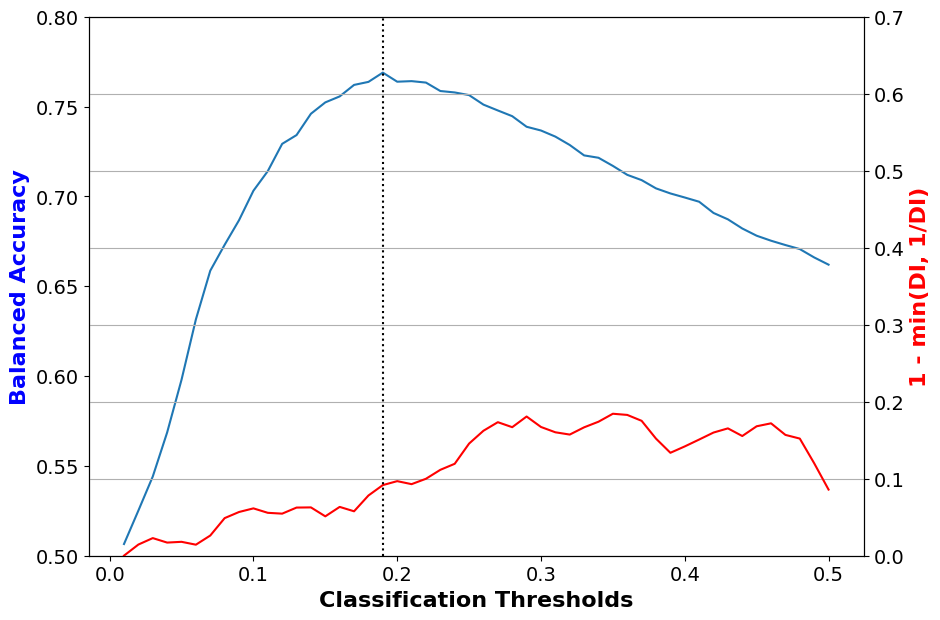

In [54]:
plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     disp_imp_err, '1 - min(DI, 1/DI)')

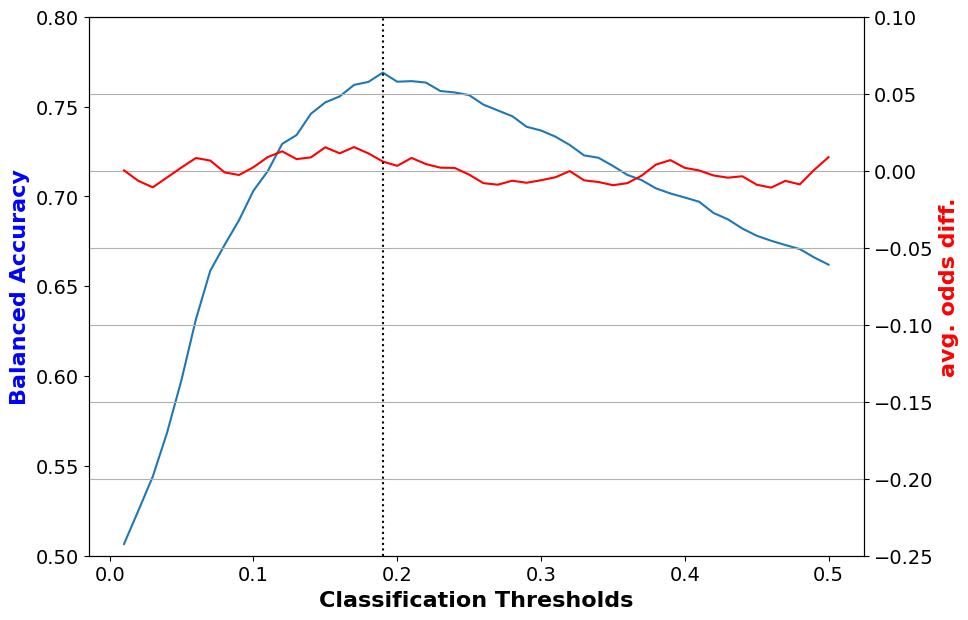

In [55]:
plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     val_metrics['avg_odds_diff'], 'avg. odds diff.')

In [56]:
# Test our LR model
lr_transf_metrics = test(dataset=dataset_orig_panel19_test,
                         model=lr_transf_panel19,
                         thresh_arr=[thresh_arr[lr_transf_best_ind]])

describe_metrics(lr_transf_metrics, [thresh_arr[lr_transf_best_ind]])

Threshold corresponding to Best balanced accuracy: 0.1900
Best balanced accuracy: 0.7544
Corresponding 1-min(DI, 1/DI) value: 0.1153
Corresponding average odds difference value: -0.0077
Corresponding statistical parity difference value: -0.0466
Corresponding equal opportunity difference value: -0.0137
Corresponding Theil index value: 0.0912


In [57]:
# Train RF model using reweighted data
dataset = dataset_transf_panel19_train
model = make_pipeline(StandardScaler(),
                      RandomForestClassifier(n_estimators=500, min_samples_leaf=25))
fit_params = {'randomforestclassifier__sample_weight': dataset.instance_weights}
rf_transf_panel19 = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)

# Validate RF model trained on reweighted data

# linspace of potential thresholds to be used
thresh_arr = np.linspace(0.01, 0.5, 50)

# Big list of all the results per metric per threshold
val_metrics = test(dataset=dataset_orig_panel19_val,
                   model=rf_transf_panel19,
                   thresh_arr=thresh_arr)

# Index of threshold that provides the best balanced accuracy
rf_transf_best_ind = np.argmax(val_metrics['bal_acc'])

disp_imp = np.array(val_metrics['disp_imp'])
disp_imp_err = 1 - np.minimum(disp_imp, 1/disp_imp)

describe_metrics(val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.2100
Best balanced accuracy: 0.7623
Corresponding 1-min(DI, 1/DI) value: 0.1974
Corresponding average odds difference value: -0.0418
Corresponding statistical parity difference value: -0.0812
Corresponding equal opportunity difference value: -0.0309
Corresponding Theil index value: 0.0897


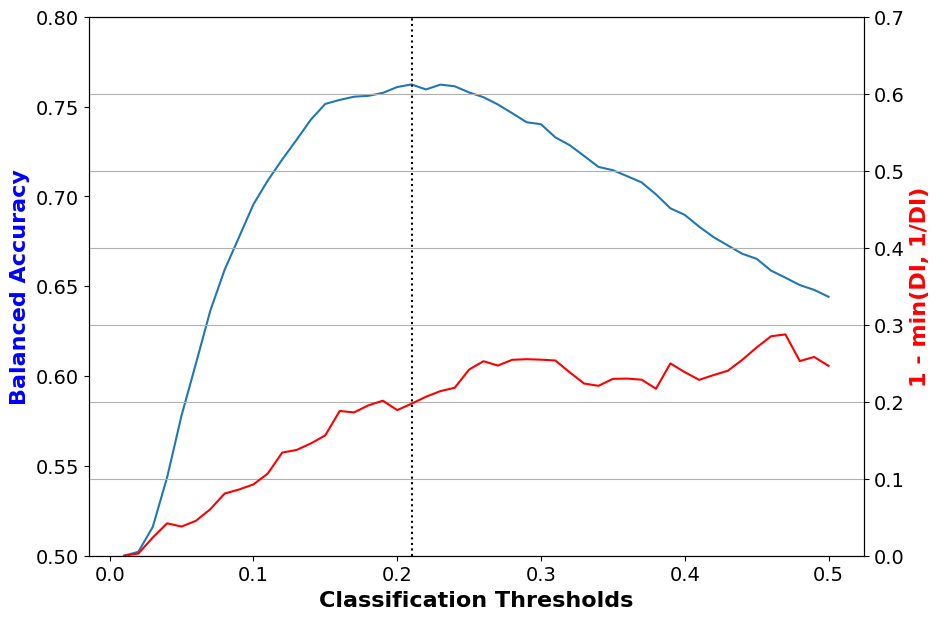

In [58]:
plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     disp_imp_err, '1 - min(DI, 1/DI)')

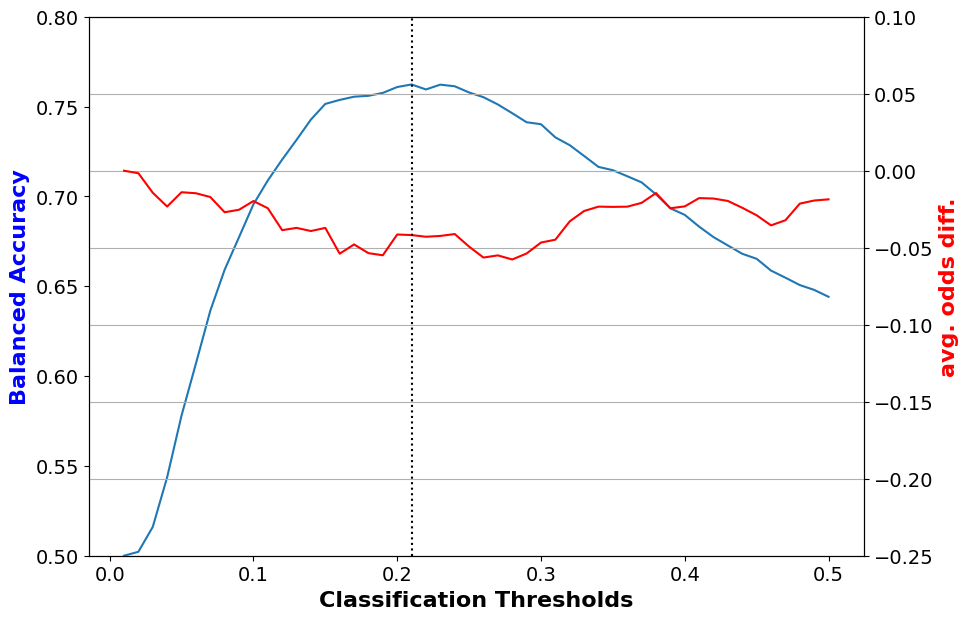

In [59]:
plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     val_metrics['avg_odds_diff'], 'avg. odds diff.')

In [60]:
# Test our RF model
rf_transf_metrics = test(dataset=dataset_orig_panel19_test,
                         model=rf_transf_panel19,
                         thresh_arr=[thresh_arr[rf_transf_best_ind]])

describe_metrics(rf_transf_metrics, [thresh_arr[rf_transf_best_ind]])

Threshold corresponding to Best balanced accuracy: 0.2100
Best balanced accuracy: 0.7581
Corresponding 1-min(DI, 1/DI) value: 0.2511
Corresponding average odds difference value: -0.0635
Corresponding statistical parity difference value: -0.1128
Corresponding equal opportunity difference value: -0.0495
Corresponding Theil index value: 0.0913


### [5B.](#Table-of-Contents) Prejudice Remover (in-processing bias mitigation) -  AIF360 Example

In [61]:
# Initialize PrejudiceRemover with fairness penalty parameter of 25
model = PrejudiceRemover(sensitive_attr=sens_attr, eta=25.0)
pr_orig_scaler = StandardScaler()

dataset = dataset_orig_panel19_train.copy()
dataset.features = pr_orig_scaler.fit_transform(dataset.features)

# Train PR model on original dataset
pr_orig_panel19 = model.fit(dataset)

In [62]:
# Validate PR model

# linspace of potential thresholds to be used
thresh_arr = np.linspace(0.01, 0.50, 50)

dataset = dataset_orig_panel19_val.copy()
dataset.features = pr_orig_scaler.transform(dataset.features)

# Big list of all the results per metric per threshold
val_metrics = test(dataset=dataset,
                   model=pr_orig_panel19,
                   thresh_arr=thresh_arr)
pr_orig_best_ind = np.argmax(val_metrics['bal_acc'])

loadtxt: input contained no data: "C:\Users\chris\AppData\Local\Temp\tmp4sxyfe7j"


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### [5C.](#Table-of-Contents) Bias mitigation using a technique of your own

In [63]:
# Using a disparate impact remover
from tqdm import tqdm
from aif360.algorithms.preprocessing import DisparateImpactRemover

dataset = dataset_orig_panel19_train.copy()

In [64]:
# Record the disparate impacts and balanced accuracies at each 
# potential repair level of the disparate impact remover
DIs = []
best_bal_accs = []
repair_levels = np.linspace(0., 1., 11)
for level in tqdm(repair_levels):
    # Instantiate a DisparateImpactRemover at the given repair level and transform the data
    di = DisparateImpactRemover(repair_level=level)
    train_repd = di.fit_transform(dataset_orig_panel19_train)
    val_repd = di.fit_transform(dataset_orig_panel19_val)

    
    # Train LR model using transformed data
    model = make_pipeline(StandardScaler(),
                          LogisticRegression(solver='liblinear', random_state=1))
    fit_params = {'logisticregression__sample_weight': dataset.instance_weights}
    lr_transf_panel19 = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)    
    val_metrics = test(dataset=val_repd,
                   model=lr_transf_panel19,
                   thresh_arr=thresh_arr)

    # Index of threshold that provides the best balanced accuracy
    rf_transf_best_ind = np.argmax(val_metrics['bal_acc'])

    # Get balanced accuracy and disparate impact corresponding to that index
    best_bal_accs.append(val_metrics['bal_acc'][lr_transf_best_ind])
    disp_imp = val_metrics['disp_imp'][lr_transf_best_ind]    
    DIs.append(disp_imp)

100%|██████████████████████████████████████████████████████████████████████████████| 11/11 [09:31<00:00, 51.97s/it]


In [65]:
best_bal_accs, DIs

([0.7613839509541025,
  0.7613839509541025,
  0.760998980599729,
  0.7609608918576795,
  0.7609608918576795,
  0.7608328603763195,
  0.7615074581871384,
  0.7611074278816816,
  0.7609654413292668,
  0.7607486967284105,
  0.7607001225530571],
 [0.6237117868207941,
  0.6237117868207941,
  0.6211851819262887,
  0.6213590592059419,
  0.6213590592059419,
  0.6203993990916151,
  0.6402466462567674,
  0.6379822740839002,
  0.6368964527264285,
  0.635795918866842,
  0.6354267013943079])

In [66]:
repair_levels

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

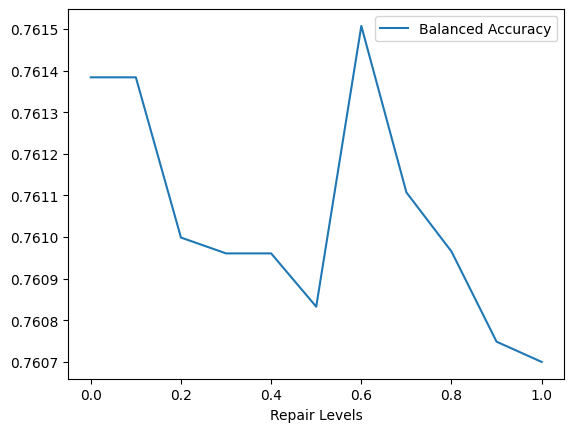

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(repair_levels, best_bal_accs, label='Balanced Accuracy')
plt.xlabel('Repair Levels')
plt.legend()
plt.show()

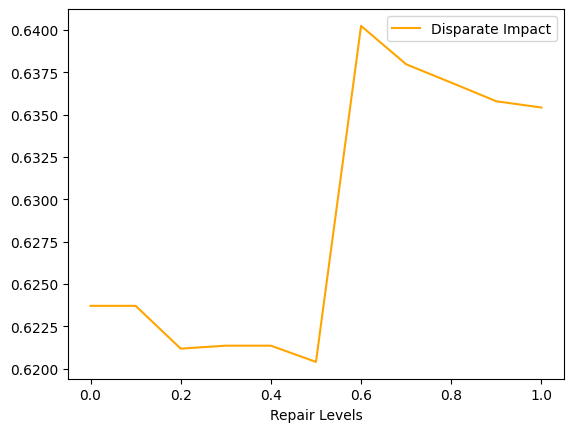

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(repair_levels, DIs, label='Disparate Impact', color='orange')
plt.xlabel('Repair Levels')
plt.legend()
plt.show()

In [69]:
# Record the disparate impacts and balanced accuracies at each 
# potential repair level of the disparate impact remover
DIs = []
best_bal_accs = []
repair_levels = np.linspace(0., 1., 11)
for level in tqdm(repair_levels):
    # Instantiate a DisparateImpactRemover at the given repair level and transform the data
    di = DisparateImpactRemover(repair_level=level)
    train_repd = di.fit_transform(dataset_orig_panel19_train)
    val_repd = di.fit_transform(dataset_orig_panel19_val)

    
    # Train RF model using transformed data
    model = make_pipeline(StandardScaler(),
                          RandomForestClassifier(n_estimators=500, min_samples_leaf=25))
    fit_params = {'randomforestclassifier__sample_weight': dataset.instance_weights}
    rf_transf_panel19 = model.fit(train_repd.features, train_repd.labels.ravel(), **fit_params)
    
    val_metrics = test(dataset=val_repd,
                   model=rf_transf_panel19,
                   thresh_arr=thresh_arr)

    # Index of threshold that provides the best balanced accuracy
    rf_transf_best_ind = np.argmax(val_metrics['bal_acc'])

    # Get balanced accuracy and disparate impact corresponding to that index
    best_bal_accs.append(val_metrics['bal_acc'][rf_transf_best_ind])
    disp_imp = val_metrics['disp_imp'][rf_transf_best_ind]    
    DIs.append(disp_imp)

100%|██████████████████████████████████████████████████████████████████████████████| 11/11 [13:11<00:00, 71.98s/it]


In [70]:
best_bal_accs, DIs

([0.7624696279266738,
  0.7621995782477775,
  0.7638390794700999,
  0.7652441317790616,
  0.763817255514472,
  0.7641347819229223,
  0.7624371552011882,
  0.7629404290239552,
  0.7641349021707556,
  0.7648278243623734,
  0.7634211687420385],
 [0.7672204186885868,
  0.7712154326692268,
  0.7655599127632542,
  0.7515433390671004,
  0.7480135258264311,
  0.7471286398983542,
  0.7468468043923439,
  0.7460791344283698,
  0.7386821556272408,
  0.7429936206283572,
  0.7361338112224455])

In [71]:
repair_levels

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

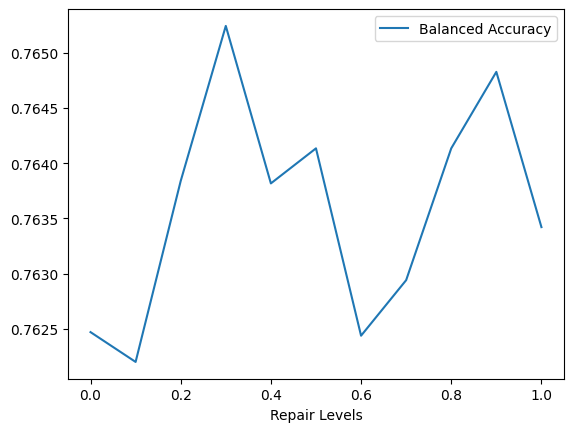

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(repair_levels, best_bal_accs, label='Balanced Accuracy')
plt.xlabel('Repair Levels')
plt.legend()
plt.show()

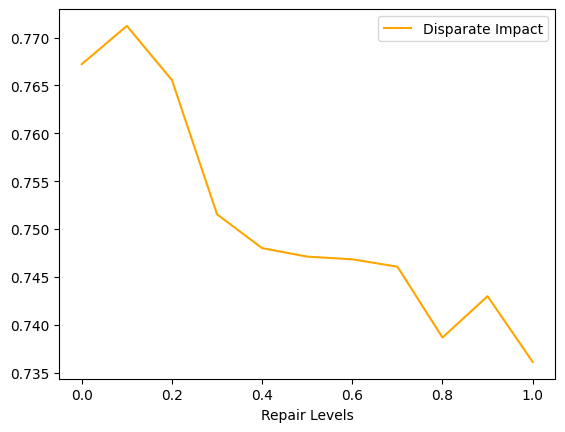

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(repair_levels, DIs, label='Disparate Impact', color='orange')
plt.xlabel('Repair Levels')
plt.legend()
plt.show()

## Section 5 Discussion

Use these questions to evaluate your models during bias-mitigation processes. 

### 5A. For **both** the logistic regression and random forest classifiers, please include visualizations the pre-processing results of your bias mitigation techniques. 

**In addition, for each Model + Bias mitigation technique, please write 1-2 SENTENCES explaining the following:**

1. Describe the bias mitigation techniques applied (what stage? type? explain what that debiasing technique does?) 

We applied the Reweighing pre-processing technique, where data was transformed by weighing groups and labels.

2. Based on defintions and sources of bias we covered in class, what type of bias are we trying to mitigate in our models?

Reweighing is a pre-processing technique that adjusts the weights of instances in the dataset to ensure fairness by mitigating disparate impact.


3. Do both models exhibit fairness and maintain accuracy? List the fairness metrics you used to support this. What about model drift?

For the logistic regression model trained on reweighted data, the fairness metrics and performance results are as follows:

Balanced Accuracy: 0.7663
1-min(DI, 1/DI) Value: 0.1970
Average Odds Difference: -0.0025
Statistical Parity Difference: -0.0685
Equal Opportunity Difference: -0.0033
Theil Index: 0.0945
These metrics indicate a reasonable balance between fairness and accuracy. The model shows a high balanced accuracy, and the 1-min(DI, 1/DI) value is relatively low, suggesting mitigated disparate impact. Additionally, the average odds difference, statistical parity difference, and equal opportunity difference are close to zero, indicating a fair distribution of outcomes across groups. The Theil Index is relatively low, suggesting fairness in distribution.



4. For the classifier ‘high’ utilization in these models + pre-processing mitigation technique; would you recommend this for our use case as a "fair" classifier? Why or why not? Use previous questions and the slide 'Sources of Bias in AI and Health Data' from our Week-07 slides, to help you answer this. 

Considering the fairness metrics and the characteristics of the logistic regression model with reweighing:

The model exhibits a balanced trade-off between accuracy and fairness, with mitigated disparate impact and low values for various fairness metrics. The 1-min(DI, 1/DI) value is particularly notable, indicating a reduced disparate impact. Therefore, for the 'high' utilization classifier in this context, the logistic regression model with the applied pre-processing mitigation technique (Reweighing) is recommended as a "fair" classifier. It strikes a reasonable balance, addressing bias concerns without compromising accuracy significantly.


### 5B. For **both** the logistic regression and random forest classifiers, please include visualizations the post-processing results of your bias mitigation techniques. [Waiting for code to work]

**In addition, for each Model + Bias mitigation technique, please write 1-2 SENTENCES explaining the following:**

1. Describe the bias mitigation techniques applied (what stage? type? explain what that debiasing technique does?) 

2. Based on defintions and sources of bias we covered in class, what type of bias are we trying to mitigate in our models?


3. Do both models exhibit fairness and maintain accuracy? List the fairness metrics you used to support this. What about model drift?

4. For the classifier ‘high’ utilization in these models + post-processing mitigation technique; would you recommend this for our use case as a "fair" classifier? Why or why not? Use previous questions and the slide 'Sources of Bias in AI and Health Data' from our Week-07 slides, to help you answer this. 

### 5C. For **both** the logistic regression and random forest classifiers, please include visualizations for processing results of your bias mitigation techniques OF YOUR CHOICE. 

**In addition, for each Model + Bias mitigation technique of your choice, please write 1-2 SENTENCES explaining the following:**

1. Describe the bias mitigation techniques applied (what stage? type? explain what that debiasing technique does?) 

We employed the Disparate Impact Remover as a post-processing technique. This technique operates by adjusting the features of the dataset to reduce disparate impact, promoting fairness.

2. Based on defintions and sources of bias we covered in class, what type of bias are we trying to mitigate in our models?

The Disparate Impact Remover aims to mitigate disparate impact, which occurs when there are differences in the outcomes of a model for different groups, leading to potential unfairness.

3. Do both models exhibit fairness and maintain accuracy? List the fairness metrics you used to support this. What about model drift?

Fairness metrics, including Balanced Accuracy and Disparate Impact, were used to evaluate the models at different repair levels. The visualizations show trade-offs between balanced accuracy and disparate impact, allowing for a nuanced understanding of fairness and accuracy trade-offs.

4. For the classifier ‘high’ utilization in these models + post-processing mitigation technique; would you recommend this for our use case as a "fair" classifier? Why or why not? Use previous questions and the slide 'Sources of Bias in AI and Health Data' from our Week-07 slides, to help you answer this.

The Disparate Impact Remover demonstrates a trade-off between balanced accuracy and disparate impact. The optimal repair level depends on the acceptable level of disparate impact versus the importance of balanced accuracy. Considering the trade-offs, a careful examination of the specific requirements and priorities of the use case is needed before recommending this as a "fair" classifier.

## Section 5: Overall Discussion for Bias Mitigation, write 1-2 paragraphs for each question

1. What factors must be considered during AI model-development and performance? How and where are they vulnerable to introducing bias?

One factor that is essential for consideration during AI model development and performance is the process of data collection and quality assurance. It is important for data to be representative of the whole population and spectrum of diversity for whoever the target audience of the algorithm is, as models that are trained on skewed or incomplete data will have inherent biases that can have severely detrimental consequences for certain populations of people. For example, a model trained on historical data may inadvertently reflect historical racial biases and prejudices. Furthermore, data should be preprocessed in a way that does not impact the meaning of the data through methods like imputation and outlier detection and removal. Another factor that is essential for consideration during model development is the process of feature selection and engineering, because the features chosen in the final model have a significant impact on its performance and fairness. Certain features may correlate in a biased way with demographic factors such as race and sex, even if it doesn’t appear so on the surface; therefore, it is vital to thoroughly examine all features and their correlations during EDA and select features that are crucial to solving the problem without introducing biases and prejudices. A third factor that is essential for consideration during model performance is the deployment stage, in which the model is in the real-world making predictions. It is essential for models to be constantly monitored for performance and fairness and for metrics like disparate impact to be measured as the model continues to work, and as more data is added and the model is trained and improved, for these metrics to continue to be evaluated. As society changes, the models need to be updated accordingly to ensure fairness.



2. How and what should be measured to assess downstream impact of AI, and what factors should be used to audit for bias and clinical impact? 


AI has a significant impact in real-world applications by influencing decision-making and interacting with various stakeholders. To measure this impact and audit for bias and clinical impact, there are several key factors that must be considered. Fairness metrics and bias assessment tools like AIF360 are important to evaluate fairness across all demographics using numbers like disparate impact, equal opportunity, and equalized odds. The model’s performance should also be evaluated by experts in a given field, such as doctors evaluating a diagnosis algorithms’ performance and the process that went into model development, to better ensure that the model is performing up to high standards. Furthermore, transparency during the entire process of model development and all of the decisions that were made during this process is vital to ensure model reproducibility as well as to help determine if there were decisions made that inadvertently have an impact on the model’s fairness, as third party auditors would be able to detect. Receiving feedback from various stakeholders and users of the algorithm is another way to understand model performance and audit for bias.

3. Define what disparate impact is. How can the type, dimension, collection-method, and representation in data lead to bias and disparate impact in communities of concern? Use the MEPS codebooks, and websites to help you explain this. Refer to Center of Disease Control (CDC) [Health Equity Guiding Principles for Inclusive Communication](https://www.cdc.gov/healthcommunication/Health_Equity.html) for style recommendations when referring to affected groups.

Disparate impact refers to when an algorithm’s decision making disproportionately impacts certain individuals or groups of people based on certain demographic characteristics, such as race or sex. In examining healthcare and the MEPS dataset specifically, disparities in data collection and model development methods can adversely impact or differently impact different communities of people. If the type of data collected has selection bias, primarily focusing on specific groups of people or excluding certain populations, then the datasets will be biased to misrepresent the entire population. Secondly, the dimension of the data is essential for consideration because we do not want to overlook important factors that can impact health and would be important for the performance of our model. Third, the collection method can be poorly designed; surveys with misleading questions or containing incomplete information could result in misrepresentation of data and poor quality. Finally, biases in the data collected could lead to the stigmatization or reinforced prejudices against groups of people that are no accurately represented.

4. Where there any social factors overlooked when developing AI-targets or outcomes for the AIF360 exmaple? How could they delay access and quality of care to underserved populations?

When developing AI targets or outcomes for the AIF360 example, certain social factors may have been overlooked, potentially hindering access and quality of care for underserved populations. These factors could include socio-economic status, cultural differences, and regional disparities in healthcare resources. If the model primarily focuses on easily quantifiable factors like medical history and neglects these social determinants, it might not accurately capture the complexities of healthcare access. For instance, a model might prioritize patients with better access to healthcare resources, inadvertently disadvantaging those in marginalized communities with limited access. To address this, it is crucial to consider a more comprehensive set of features that encompass social determinants of health to ensure fair and equitable outcomes for all populations.

5. (a) Overall, if you were to select ONE (a) Model, and (b) Bias-mitigation technique - for this use case where you are recommending a 'Fair' classifier for flagging 'High' utilization, which would you chose and why? (b) How would it affect Non-White beneficiaries who could have risk factor predictors that could inform a model to prioritize additional care? How could it do the opposite? (c) Explain how you would justify fair-accuracy trade-off. 

(a) For the use case of recommending a 'Fair' classifier for flagging 'High' utilization, I would choose the (a) model of logistic regression due to its simplicity and interpretability, making it easier to identify and mitigate biases. (b) As for bias-mitigation technique, I would opt for adversarial training, as it helps the model learn robust features by explicitly considering sensitive attributes, minimizing the risk of perpetuating disparities. (c) This approach acknowledges the trade-off between fairness and accuracy. While striving for fairness, there might be a slight reduction in overall accuracy, but the benefit lies in the model's ability to avoid disproportionately impacting Non-White beneficiaries. The justification for this trade-off is rooted in the ethical imperative to ensure that the model's predictions do not reinforce existing health disparities. Therefore, prioritizing fairness, even at the expense of a small reduction in accuracy, is a justifiable and ethical approach in this context.


### End of Replication Part 03b -  Discussion Section: Bias Mitigation Techniques

----


### [6.](#Table-of-Contents) Results Summary

### [7.](#Table-of-Contents) Explainability

### [8.](#Table-of-Contents) Conclusion & Discussion